# Site-based statistics

RosEl, magenta-flank full-red vs. yellow-flank yellow individuals

In [1]:
library(dplyr)
library(data.table)
library(foreach)
library(ggplot2)
library(gridExtra)

plot_theme <- theme_bw() + 
                theme(plot.title = element_text(hjust = 0.5), 
                      panel.grid = element_blank())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
setwd('/Users/apal/Phd/Projects/2021-snap_hap/genome_scans/')

## Read files

In [3]:
posStart = 52500000
posEnd = 53500000

In [4]:
w3KBs30b = fread('./pops_highCov_pmFR_pyYe/pmFRpyYe_hCov_RosEl_coordinate_w3000_s30.csv.gz')
w3KBs30b = w3KBs30b[start>(posStart) & end<(posEnd)]
str(w3KBs30b)

Classes ‘data.table’ and 'data.frame':	33234 obs. of  9 variables:
 $ scaffold     : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ start        : int  52500001 52500031 52500061 52500091 52500121 52500151 52500181 52500211 52500241 52500271 ...
 $ end          : int  52503000 52503030 52503060 52503090 52503120 52503150 52503180 52503210 52503240 52503270 ...
 $ mid          : num  52501542 52501542 52501580 52501647 52501667 ...
 $ sites        : int  157 157 157 158 156 156 156 157 156 153 ...
 $ pi_pmFR      : num  0.137 0.137 0.135 0.137 0.137 ...
 $ pi_pyYe      : num  0.079 0.079 0.0784 0.0832 0.0835 0.0856 0.0864 0.0896 0.0929 0.0976 ...
 $ dxy_pmFR_pyYe: num  0.112 0.112 0.111 0.114 0.114 ...
 $ Fst_pmFR_pyYe: num  0.0177 0.0177 0.0176 0.0165 0.0164 0.0152 0.015 0.0141 0.0138 0.0135 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [42]:
w3KB = fread('./pops_highCov_pmFR_pyYe/pmFRpyYe_hCov_Chr6_coordinate_w3000.csv.gz')
str(w3KB)

Classes ‘data.table’ and 'data.frame':	18566 obs. of  9 variables:
 $ scaffold     : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ start        : int  1 3001 6001 9001 12001 15001 18001 21001 24001 27001 ...
 $ end          : int  3000 6000 9000 12000 15000 18000 21000 24000 27000 30000 ...
 $ mid          : num  NaN NaN NaN 11581 13409 ...
 $ sites        : int  0 0 0 13 28 62 113 64 0 0 ...
 $ pi_pmFR      : num  NaN NaN NaN 0.0778 0.1756 ...
 $ pi_pyYe      : num  NaN NaN NaN 0.0953 0.168 0.0758 0.152 0.0718 NaN NaN ...
 $ dxy_pmFR_pyYe: num  NaN NaN NaN 0.0873 0.1722 ...
 $ Fst_pmFR_pyYe: num  NaN NaN NaN 0.0046 0.0013 -0.0018 0 0.0004 NaN NaN ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [37]:
# site allele freq
frq_pmFR = fread('./pops_highCov_pmFR_pyYe/pmFR_hCov_RosEl.frq', header=F)
frq_pmFR = frq_pmFR[-1,]
colnames(frq_pmFR) = c('CHROM',	'POS', 'N_ALLELES',	'N_CHR', 'REF', 'ALT')

frq_pyYe = fread('./pops_highCov_pmFR_pyYe/pyYe_hCov_RosEl.frq', header=F)
frq_pyYe = frq_pyYe[-1,]
colnames(frq_pyYe) = c('CHROM',	'POS', 'N_ALLELES',	'N_CHR', 'REF', 'ALT')

# site pi-within
sitePi_pmFR = fread('./pops_highCov_pmFR_pyYe/pmFR_hCov_RosEl.sites.pi')
sitePi_pyYe = fread('./pops_highCov_pmFR_pyYe/pyYe_hCov_RosEl.sites.pi')

# site Fst
siteFst = fread('./pops_highCov_pmFR_pyYe/pmFRpyYe_hCov_RosEl.weir.fst')

In [6]:
## Gene annotations
gff = fread('~/Phd/Projects/2021-snap_hap/ref_genome/v3.5/Amajus_v3.5_Chr6-52800000-53100000.gff')
str(gff)

Classes ‘data.table’ and 'data.frame':	602 obs. of  9 variables:
 $ V1: chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ V2: chr  "AUGUSTUS" "AUGUSTUS" "AUGUSTUS" "AUGUSTUS" ...
 $ V3: chr  "gene" "mRNA" "stop_codon" "CDS" ...
 $ V4: int  52806363 52806363 52806363 52806363 52806363 52806786 52807571 52807571 52807571 52807571 ...
 $ V5: int  52806788 52806788 52806365 52806788 52806788 52806788 52815366 52815366 52807573 52807585 ...
 $ V6: chr  "0.8" "0.8" "." "0.8" ...
 $ V7: chr  "-" "-" "-" "-" ...
 $ V8: chr  "." "." "0" "0" ...
 $ V9: chr  "ID=AnM01G33519;Accession=GWHGBJVT033502;Alias=g35130;;transl_table=1" "ID=AnM01G33519.01;Accession=GWHTBJVT035566;Parent=AnM01G33519;Parent_Accession=GWHGBJVT033502;Alias=g35130.t1;;transl_table=1" "ID=g35130.t1.stop1;Parent=AnM01G33519.01;;transl_table=1" "ID=g35130.t1.CDS1;Parent=AnM01G33519.01;Parent_Accession=GWHTBJVT035566;Protein_Accession=GWHPBJVT035566;;transl_table=1" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [21]:
for (geneID in 1:nrow(gff[V3 == 'gene'])){
    gene = gff[V3 == 'gene'][geneID,]
    # cat(geneID, gene$V4, gene$V5, '\n')
    segments(x0=gene$V4, x1=gene$V5, y0=0.5, y1=0.5)
}

1 52806363 52806788 
2 52807571 52815366 
3 52816656 52817007 
4 52818011 52824640 
5 52835655 52842132 
6 52845496 52845819 
7 52853649 52864126 
8 52869633 52870232 
9 52872363 52874968 
10 52887385 52889737 
11 52895587 52897060 
12 52898071 52900117 
13 52907235 52907834 
14 52907940 52911483 
15 52919567 52922055 
16 52943235 52945139 
17 52958134 52959237 
18 52961320 52964290 
19 52970354 52972397 
20 52974518 52976358 
21 52977910 52979034 
22 52979650 52980711 
23 52982859 52983308 
24 52996409 52998275 
25 53007941 53010054 
26 53012715 53027902 
27 53028723 53029760 
28 53031892 53034697 
29 53037794 53038210 
30 53040438 53040911 
31 53050463 53052619 
32 53055127 53058989 
33 53060761 53062505 
34 53065811 53071494 
35 53080955 53082039 
36 53084994 53087782 
37 53088969 53090894 
38 53092426 53099494 


## Plots – Fst, dxy & pi

pdf 
  2

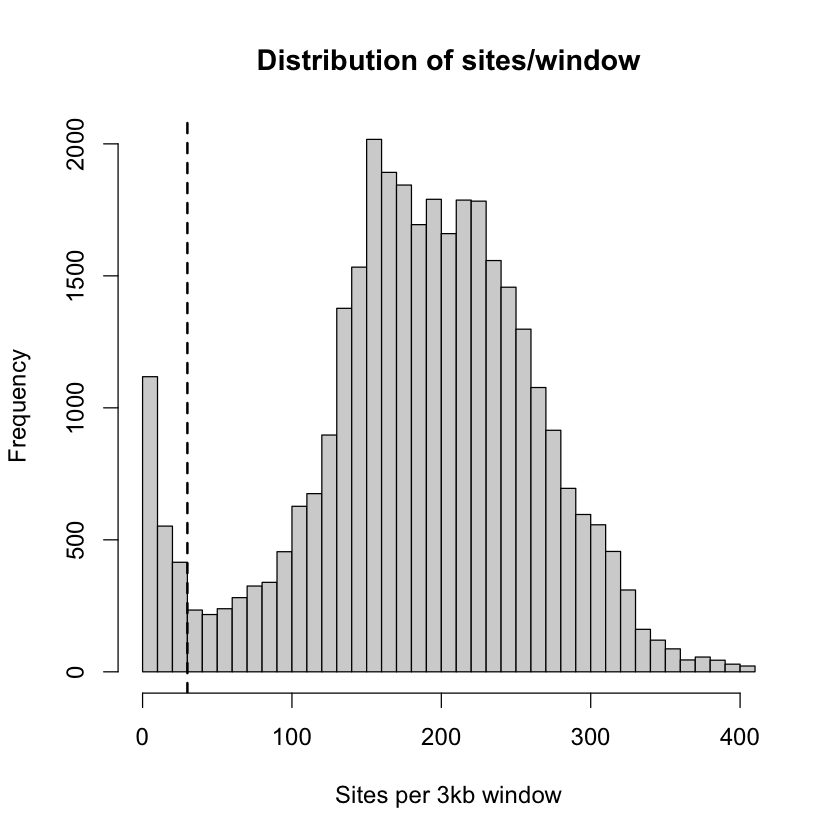

In [7]:
options(repr.plot.width=7, repr.plot.height=7)
par(cex=1.2)
hist(w3KBs30b$sites, breaks=50,
     main='Distribution of sites/window', xlab='Sites per 3kb window', ylab='Frequency')
abline(v=30, lwd=2, lty=2)

# svg('./_figures/mFRyYe_w3Ks30b/hist_sitesPerWin3K.svg', width=7, height=7, pointsize=12)
# pdf('./_figures/mFRyYe_w3Ks30b/hist_sitesPerWin3K.pdf', width=7, height=7, pointsize=12)
png('./_figures/mFRyYe_w3Ks30b/hist_sitesPerWin3K.png', width=480, height=480, pointsize=12)
hist(w3KBs30b$sites, breaks=50, main='', xlab='Sites per 3kb window', ylab='Frequency')
abline(v=30, lwd=2)
dev.off()

### Plots in 3kb windows

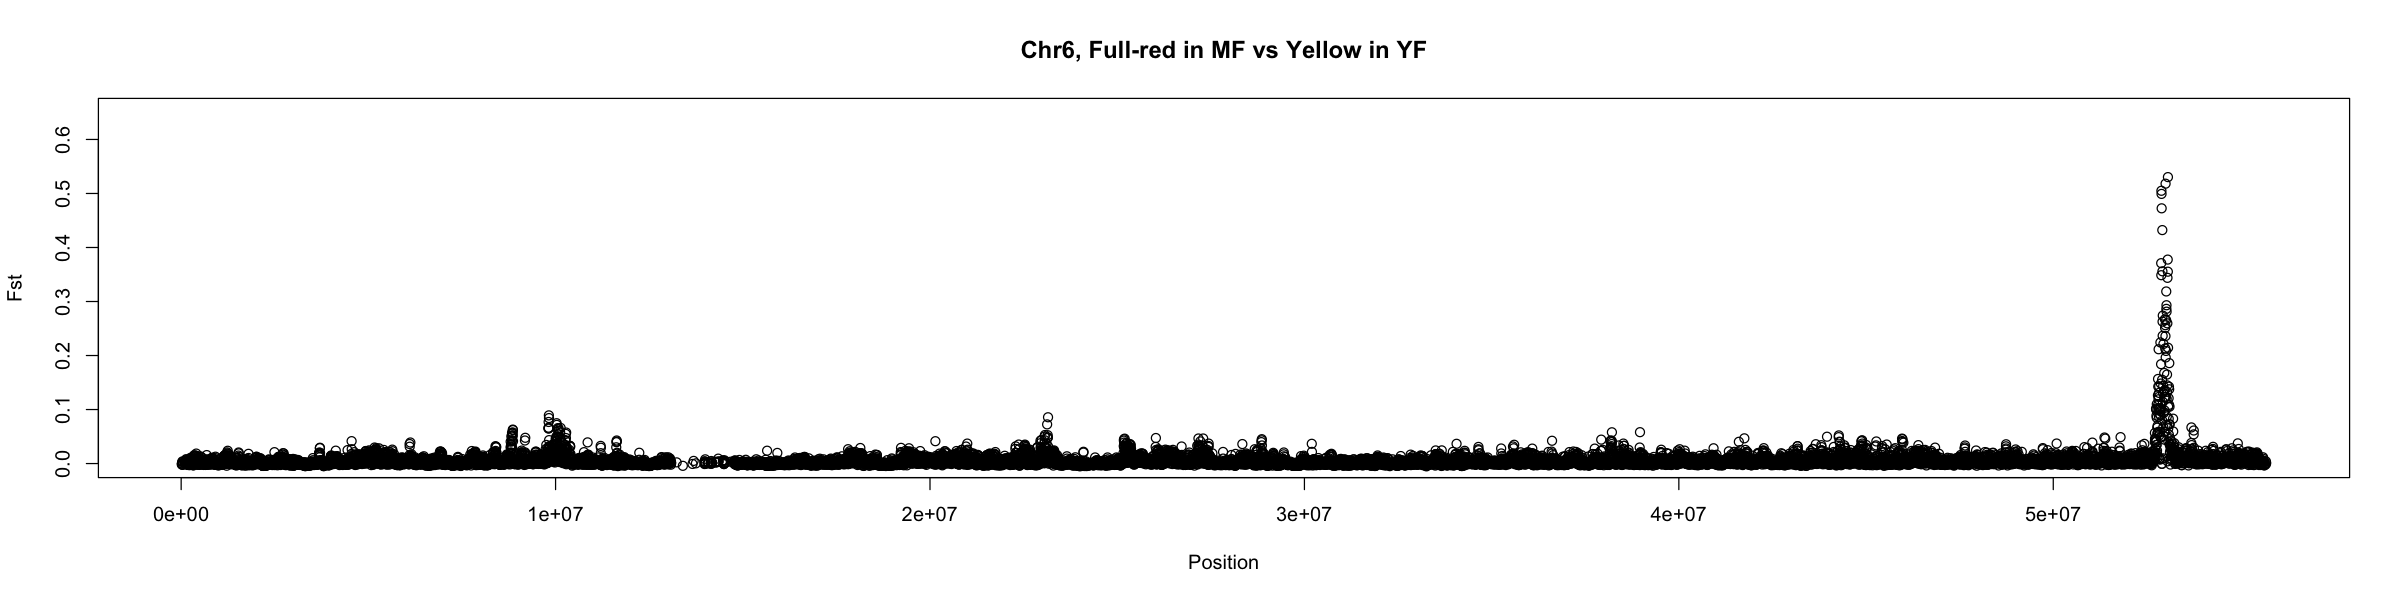

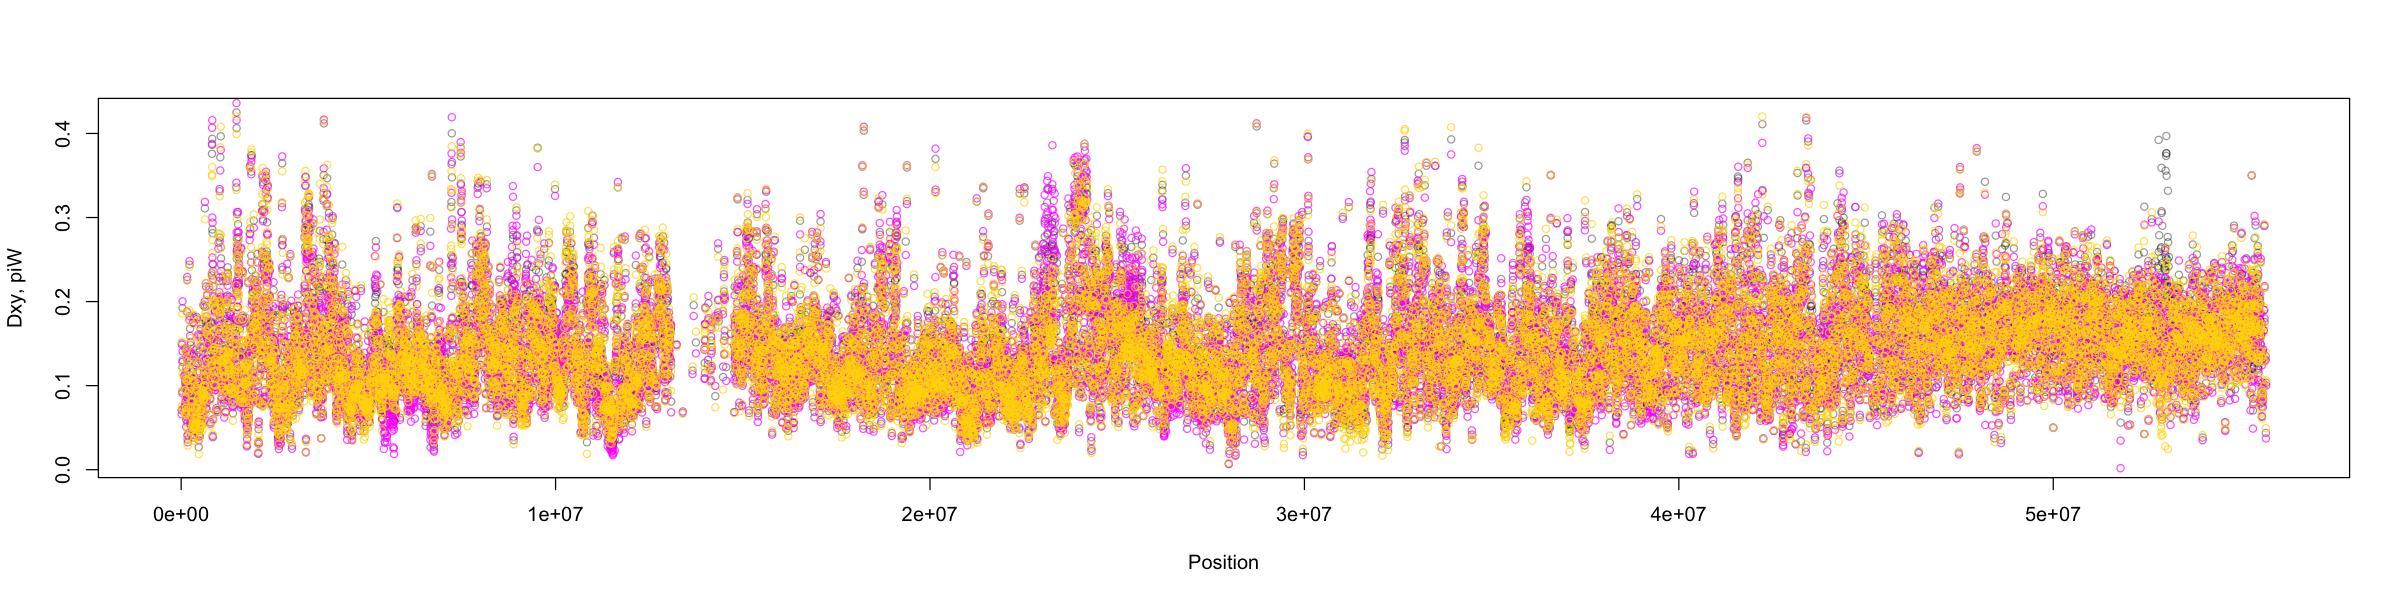

In [47]:
options(repr.plot.width=20, repr.plot.height=5)
plot(Fst_pmFR_pyYe~mid, w3KB[sites>30], 
     # xlim=xLimit, 
     ylim=c(0.0,0.65),
     main='Chr6, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')

plot(dxy_pmFR_pyYe~mid, w3KB[sites>30], xlab='Position', ylab='Dxy, piW', col=alpha('black',0.4), cex=0.8)
points(pi_pmFR~mid, w3KB[sites>30], col=alpha('magenta',0.7), cex=0.8)
points(pi_pyYe~mid, w3KB[sites>30], col=alpha('gold',0.7), cex=0.8)

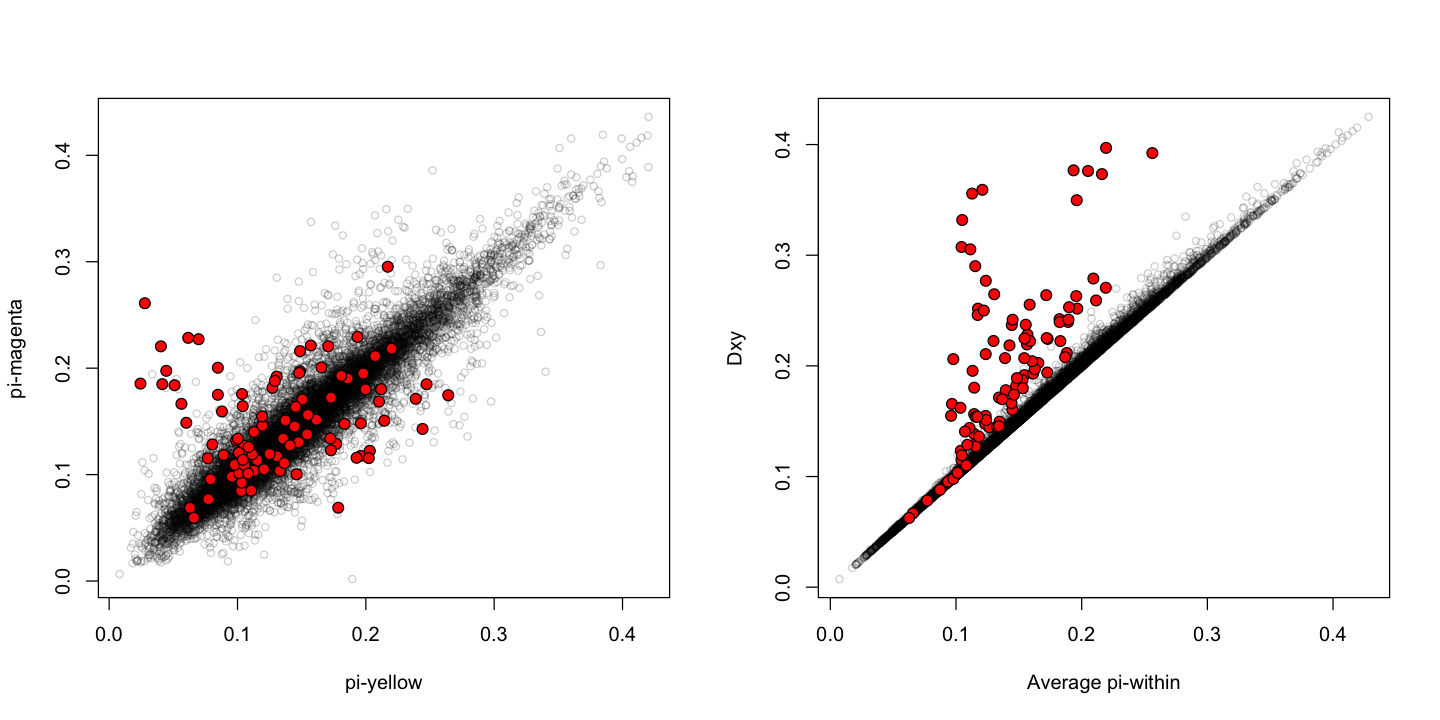

In [80]:
options(repr.plot.height=6, repr.plot.width=12)
par(mfrow=c(1,2))

plot(pi_pmFR~pi_pyYe, w3KB[sites>30], xlab='pi-yellow', ylab='pi-magenta', col=alpha('black',0.2), cex=0.8)
points(pi_pmFR~pi_pyYe, w3KB[sites>30 & start>52800000 & start<53100000], xlab='', ylab='', col=alpha('black',1.5), bg='red', cex=1.2, pch=21)

w3KB$pi_avg = (w3KB$pi_pmFR+w3KB$pi_pyYe)/2
plot(dxy_pmFR_pyYe~pi_avg, w3KB[sites>30], xlab='Average pi-within', ylab='Dxy', col=alpha('black',0.2), cex=0.8)
points(dxy_pmFR_pyYe~pi_avg, w3KB[sites>30 & start>52800000 & start<53100000], xlab='', ylab='', col=alpha('black',1.5), bg='red', cex=1.2, pch=21)

[1] 18566

[1] 100

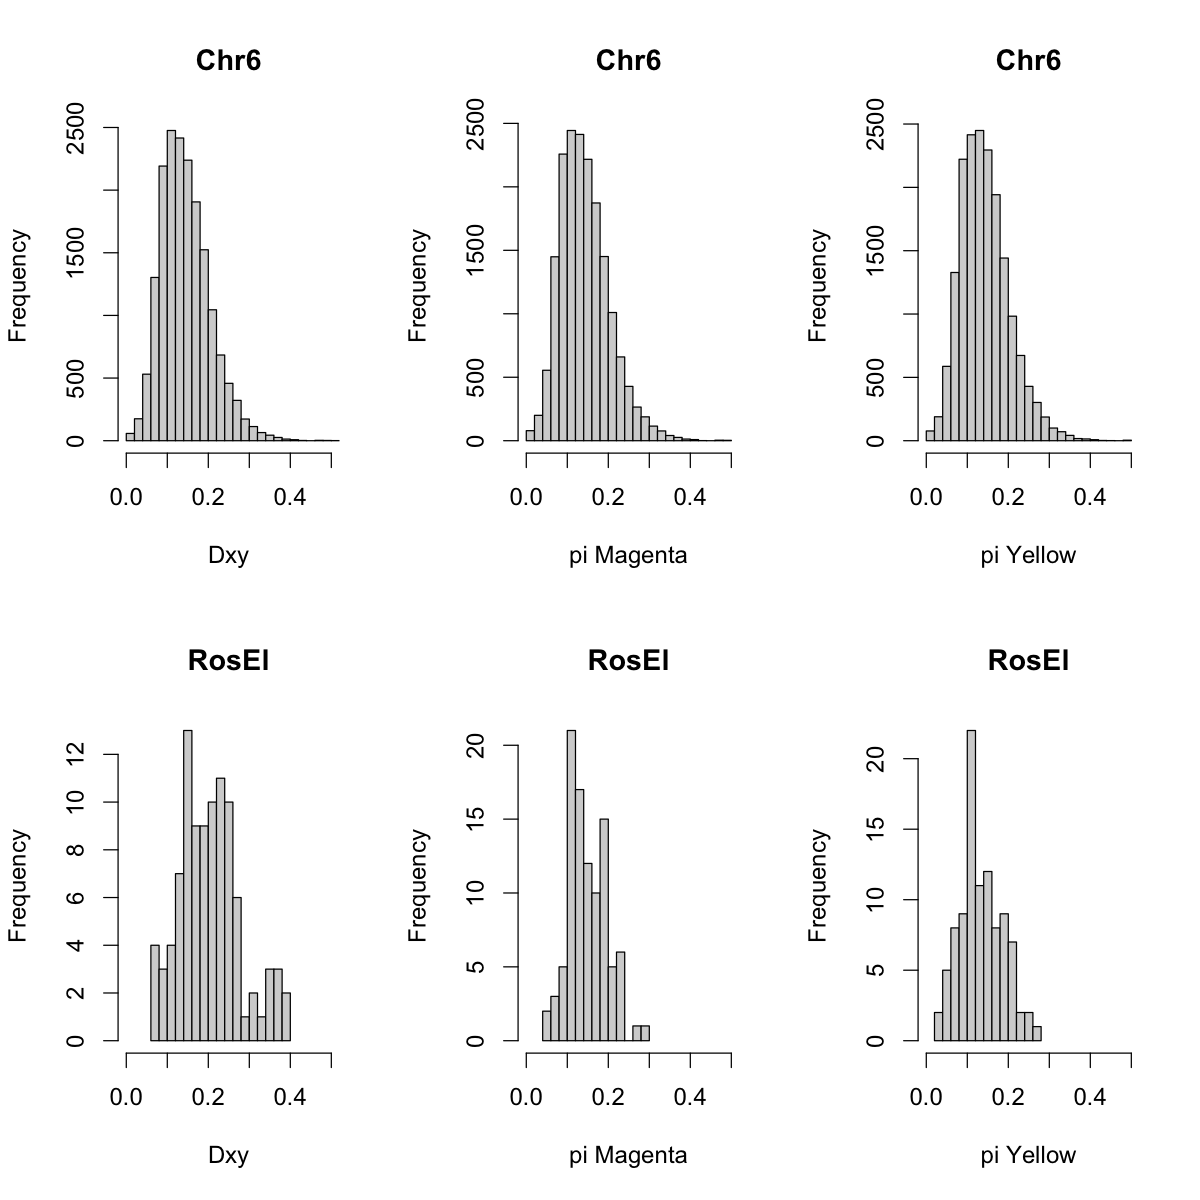

In [165]:
options(repr.plot.width=10, repr.plot.height=10)

nrow(w3KB)
nrow(w3KB[start>52800000 & start<53100000])

par(mfrow=c(2,3), cex=1.2)

hist(w3KB$dxy_pmFR_pyYe, breaks=20, xlim=c(0,0.5), main='Chr6', xlab='Dxy')
# lines(density(w3KB$dxy_pmFR_pyYe, na.rm=T), xlim=c(0,0.5))

hist(w3KB$pi_pmFR, breaks=20, xlim=c(0,0.5), main='Chr6', xlab='pi Magenta')
hist(w3KB$pi_pyYe, breaks=20, xlim=c(0,0.5), main='Chr6', xlab='pi Yellow')

hist(w3KB[start>52800000 & start<53100000]$dxy_pmFR_pyYe, breaks=20, xlim=c(0,0.5), main='RosEl', xlab='Dxy')
hist(w3KB[start>52800000 & start<53100000]$pi_pmFR, breaks=12, xlim=c(0,0.5), main='RosEl', xlab='pi Magenta')
hist(w3KB[start>52800000 & start<53100000]$pi_pyYe, breaks=12, xlim=c(0,0.5), main='RosEl', xlab='pi Yellow')

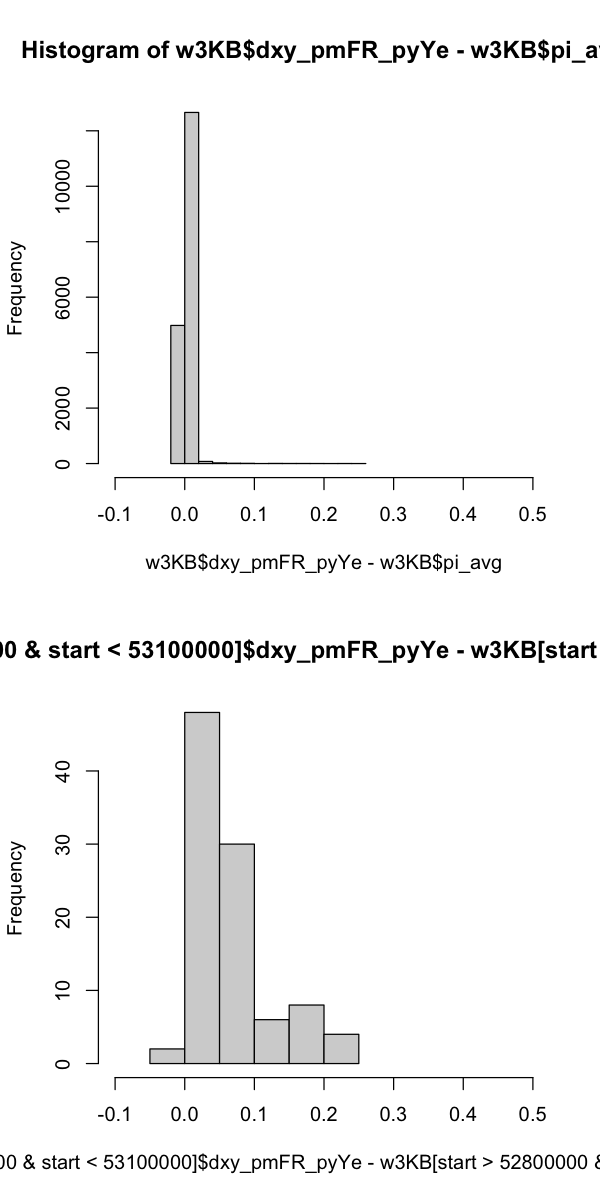

In [109]:
options(repr.plot.width=5, repr.plot.height=10)
par(mfrow=c(2,1))
hist(w3KB$dxy_pmFR_pyYe-w3KB$pi_avg, xlim=c(-0.1,0.5))
hist(w3KB[start>52800000 & start<53100000]$dxy_pmFR_pyYe-w3KB[start>52800000 & start<53100000]$pi_avg, xlim=c(-0.1,0.5))

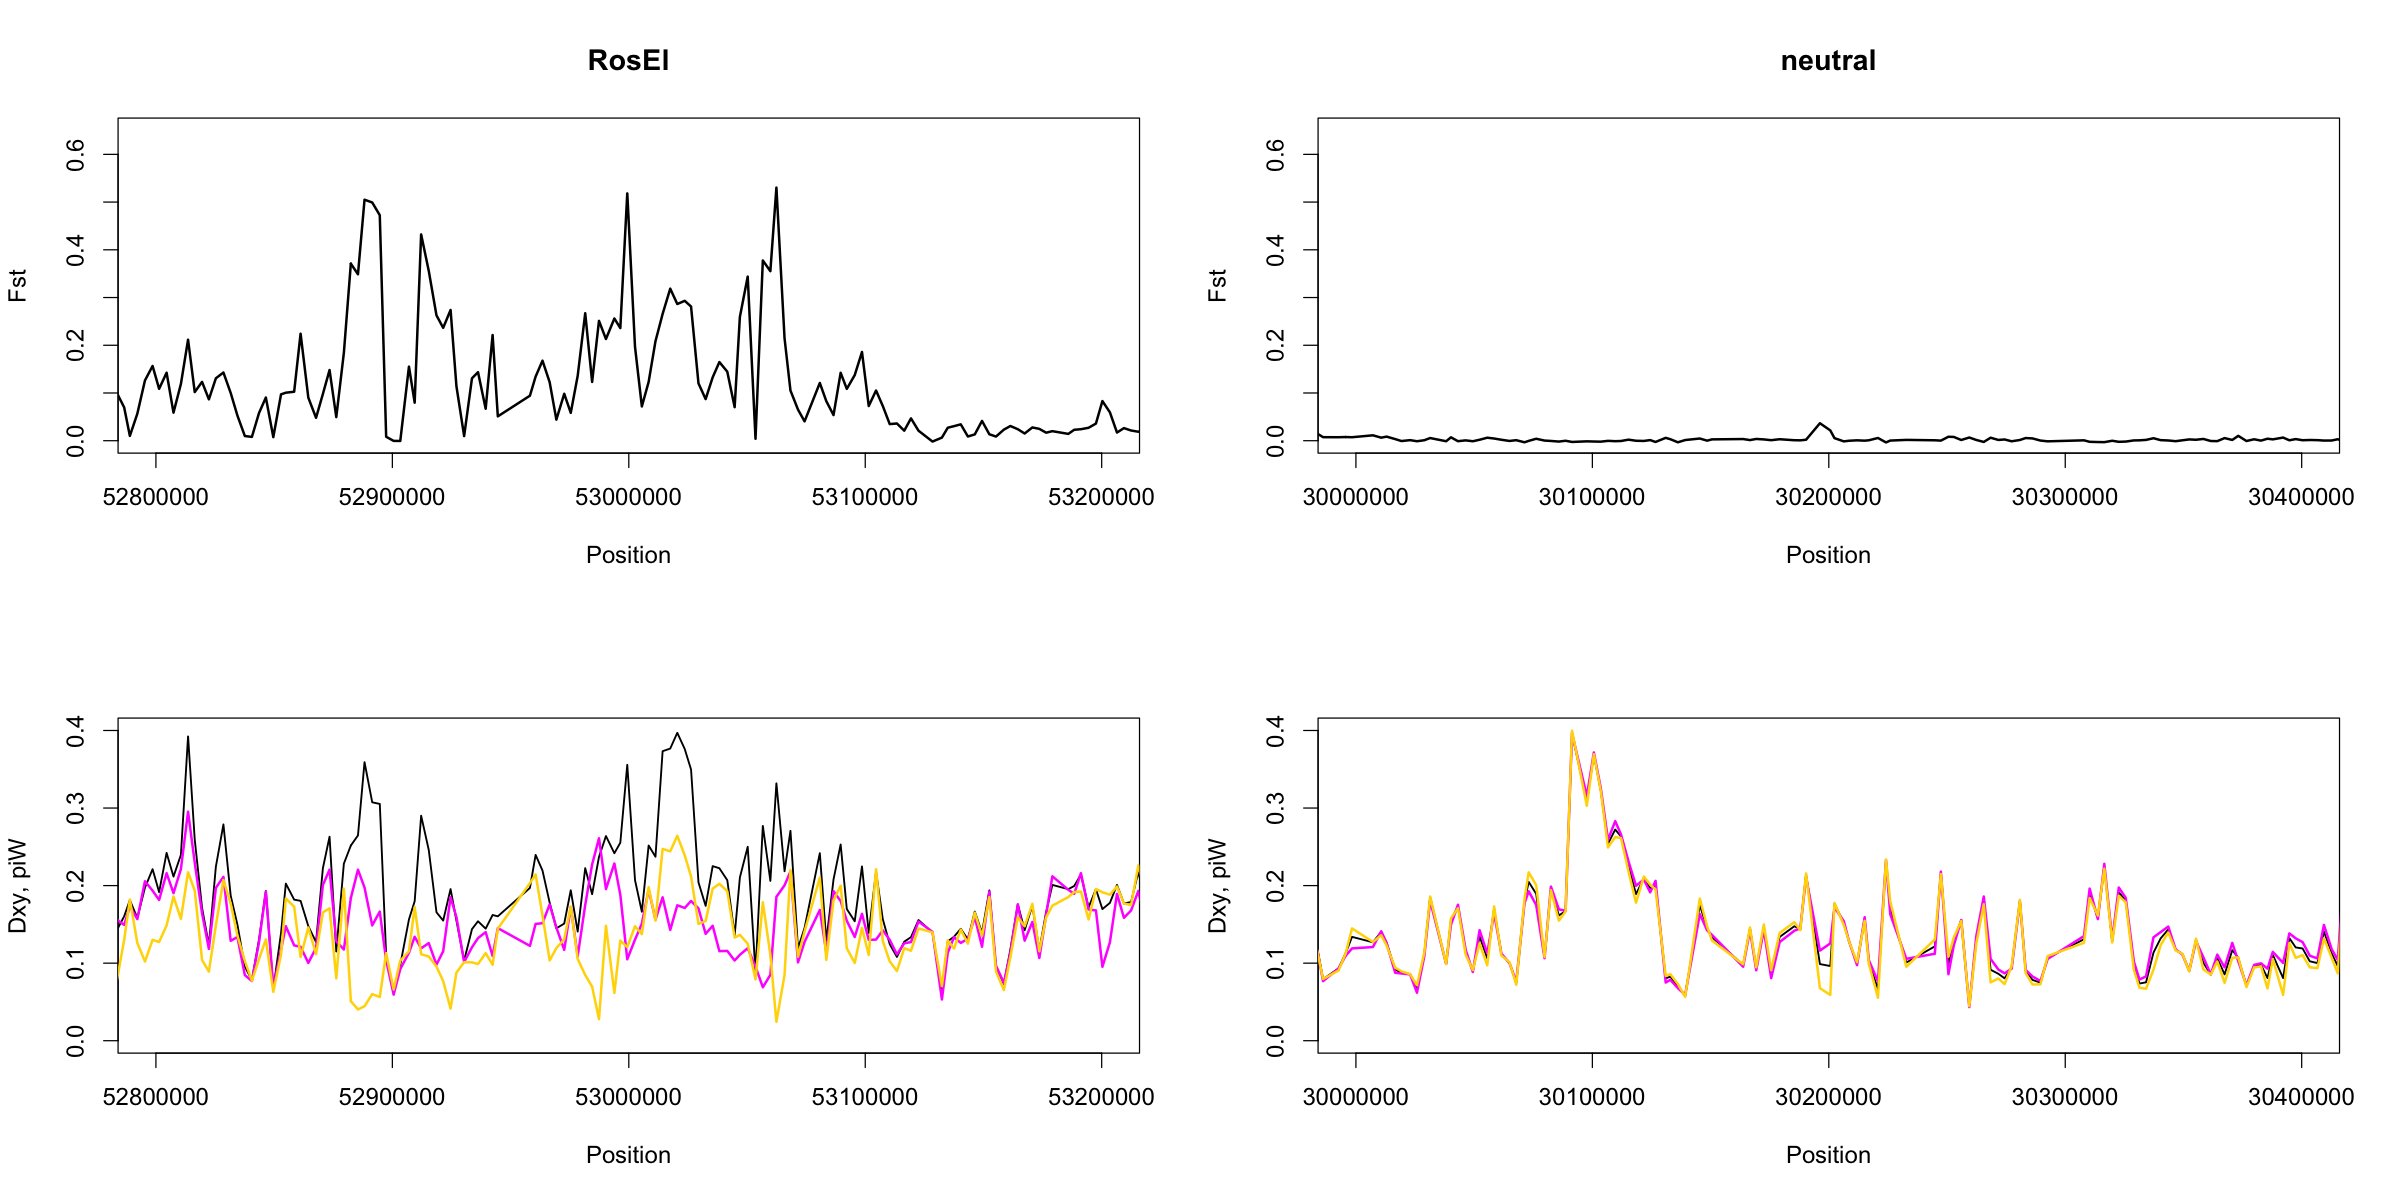

In [166]:
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(2,2), cex=1.2)

rosel = c(52800000, 53200000)
neutral = c(30000000, 30400000)

## Fst
plot(Fst_pmFR_pyYe~mid, w3KB[sites>30], type='l', lwd=2,
     xlim=rosel, ylim=c(0.0,0.65),
     main='RosEl', xlab='Position', ylab='Fst')
plot(Fst_pmFR_pyYe~mid, w3KB[sites>30], type='l', lwd=2,
     xlim=neutral, ylim=c(0.0,0.65),
     main='neutral', xlab='Position', ylab='Fst')

## Dxy, pi
#
plot(dxy_pmFR_pyYe~mid, w3KB[sites>30], type='l',
     xlim=rosel, ylim=c(0,0.4),
     xlab='Position', ylab='Dxy, piW', col=alpha('black',1), lwd=1.5)
lines(pi_pmFR~mid, w3KB[sites>30], col=alpha('magenta',1), lwd=2)
lines(pi_pyYe~mid, w3KB[sites>30], col=alpha('gold',1), lwd=2)
#
plot(dxy_pmFR_pyYe~mid, w3KB[sites>30], type='l',
     xlim=neutral, ylim=c(0,0.4),
     xlab='Position', ylab='Dxy, piW', col=alpha('black',1), lwd=1.5)
lines(pi_pmFR~mid, w3KB[sites>30], col=alpha('magenta',1), lwd=2)
lines(pi_pyYe~mid, w3KB[sites>30], col=alpha('gold',1), lwd=2)

### Plots in 3kb windows 30bp step

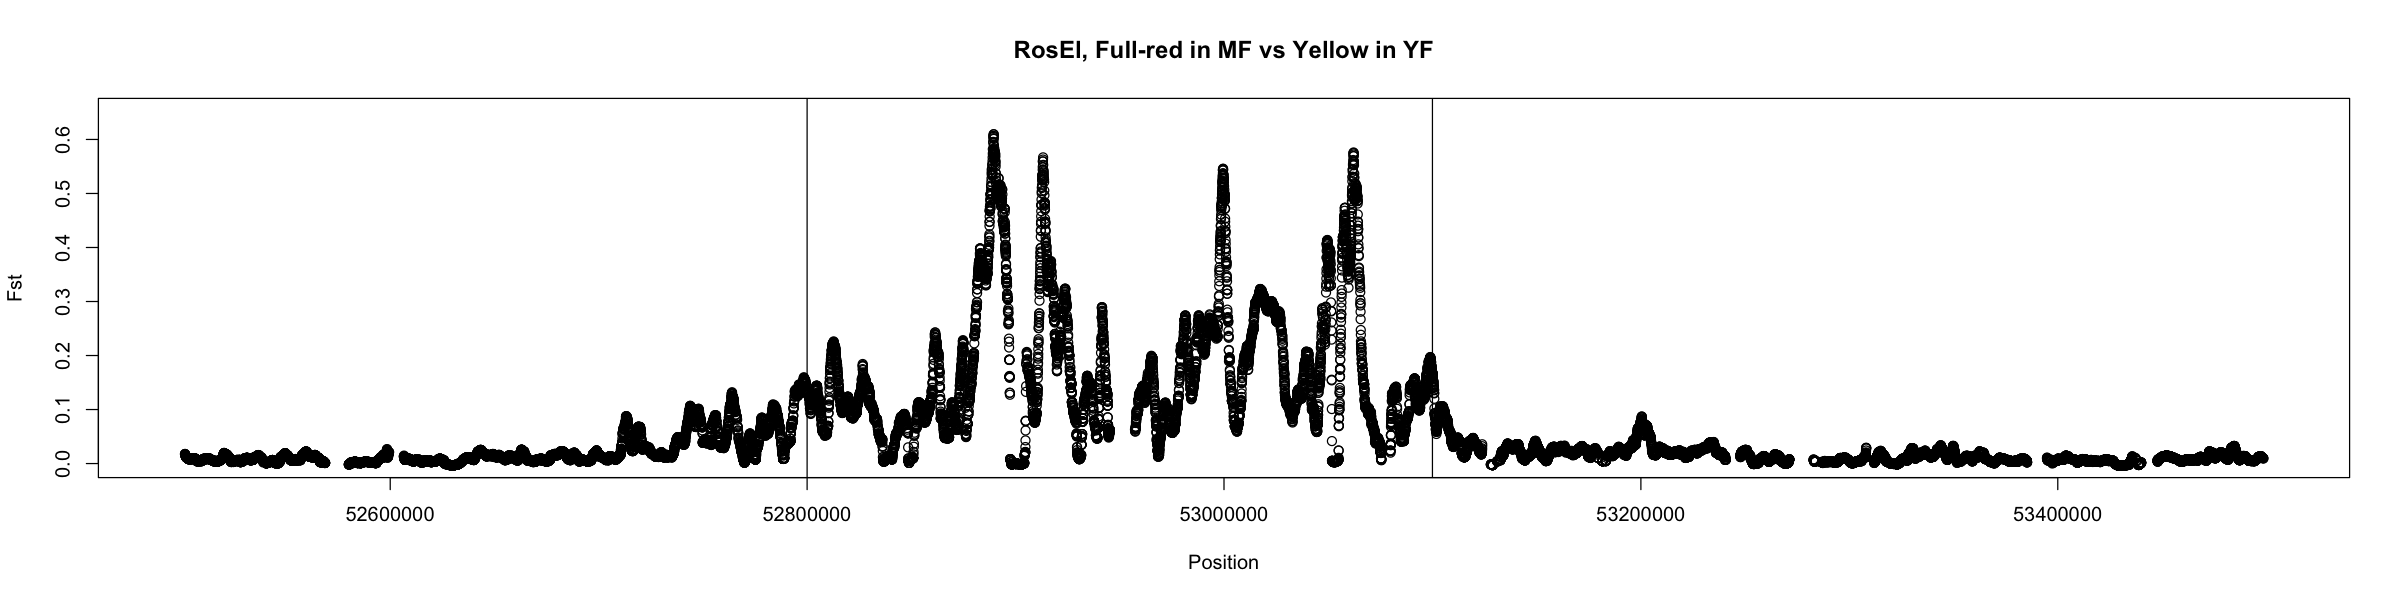

In [71]:
options(repr.plot.width=20 , repr.plot.height=5)
xLimit=c(52500000,53500000)
xLabel = 'Position'

# par(cex=1.2)
# ggplot(w3KBs30b[sites>30]) +
#     geom_point(aes(mid, Fst_pmFR_pyYe), size=2, pch=1) +
#     xlim(xLimit) +
#     ylim(c(0,0.7)) +
#     plot_theme +
#     theme()
    
plot(Fst_pmFR_pyYe~mid, w3KBs30b[sites>30], 
     xlim=xLimit, ylim=c(0.0,0.65),
     main='RosEl, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')

abline(v=c(52800000,53100000))

# for (geneID in 1:nrow(gff[V3 == 'gene'])){
#     gene = gff[V3 == 'gene'][geneID,]
#     # cat(geneID, gene$V4, gene$V5, '\n')
#     segments(x0=gene$V4, x1=gene$V5, y0=0.55, y1=0.55, lwd=3)
# }

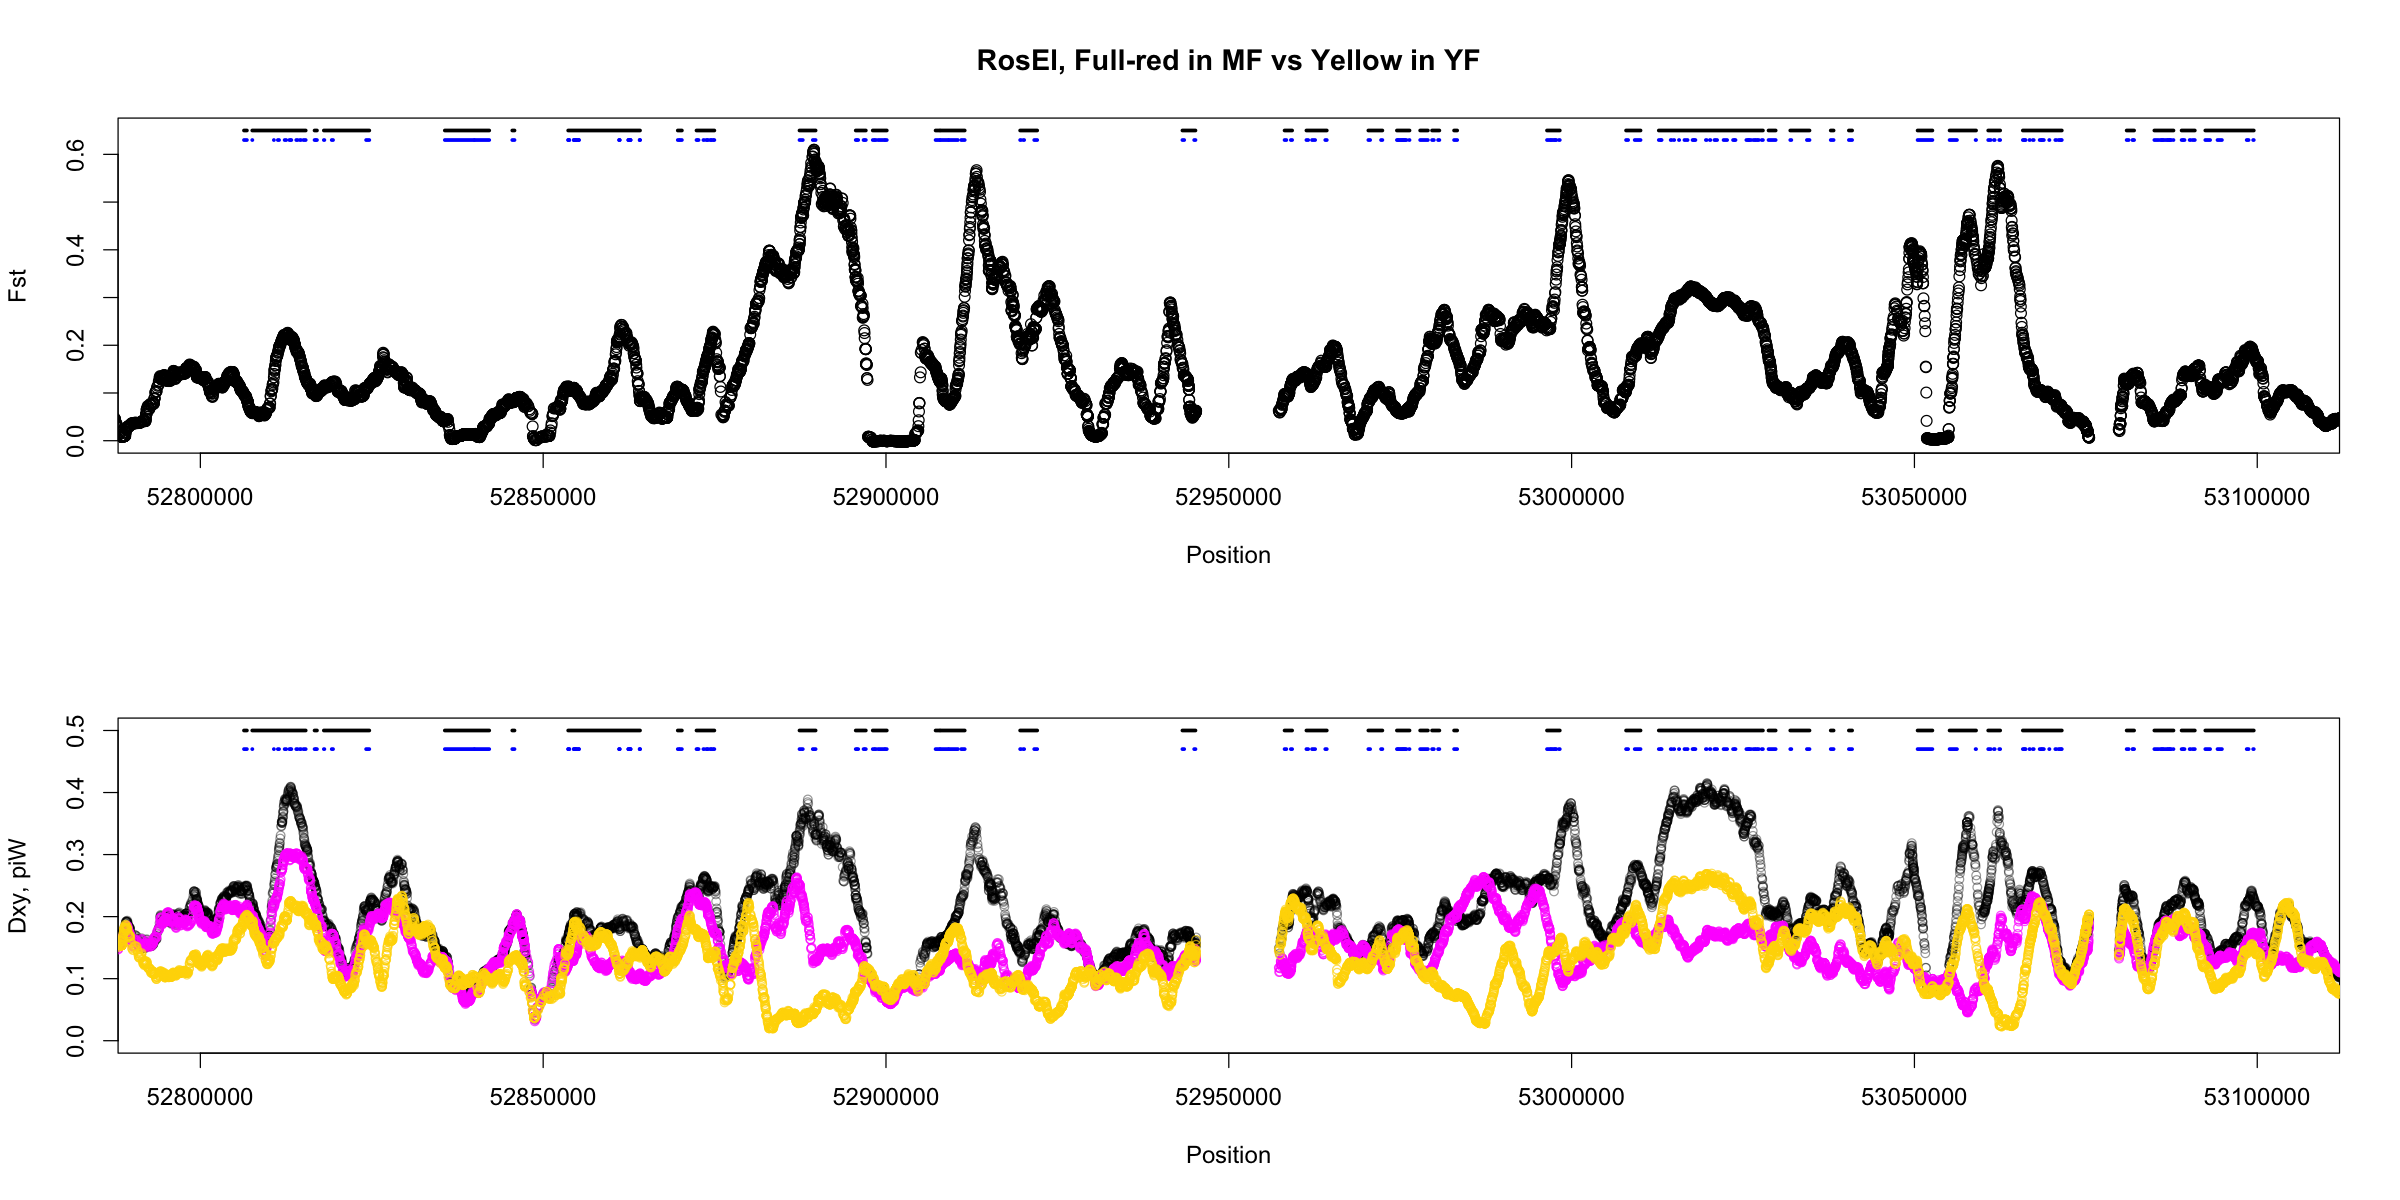

In [75]:
options(repr.plot.width=20 , repr.plot.height=10)
xLimit=c(52800000, 53100000)
xLabel = 'Position'

par(mfrow=c(2,1), cex=1.2)

#Fst
plot(Fst_pmFR_pyYe~mid, w3KBs30b[sites>30], 
     xlim=xLimit, ylim=c(0.0,0.65),
     main='RosEl, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')
for (geneID in 1:nrow(gff[V3 == 'gene'])){
    gene = gff[V3 == 'gene'][geneID,]
    segments(x0=gene$V4, x1=gene$V5, y0=0.65, y1=0.65, lwd=3)
}
for (exonID in 1:nrow(gff[V3 == 'exon'])){
    exon = gff[V3 == 'exon'][exonID,]
    segments(x0=exon$V4, x1=exon$V5, y0=0.63, y1=0.63, lwd=3, col='blue')
}

#dxy
plot(dxy_pmFR_pyYe~mid, w3KBs30b[sites>30], 
     xlim=xLimit, ylim=c(0,0.5),
     xlab='Position', ylab='Dxy, piW', col=alpha('black',0.4), cex=0.8)
points(pi_pmFR~mid, w3KBs30b[sites>30], col=alpha('magenta',0.7), cex=0.8)
points(pi_pyYe~mid, w3KBs30b[sites>30], col=alpha('gold',0.7), cex=0.8)
for (geneID in 1:nrow(gff[V3 == 'gene'])){
    gene = gff[V3 == 'gene'][geneID,]
    segments(x0=gene$V4, x1=gene$V5, y0=0.5, y1=0.5, lwd=3)
}
for (exonID in 1:nrow(gff[V3 == 'exon'])){
    exon = gff[V3 == 'exon'][exonID,]
    segments(x0=exon$V4, x1=exon$V5, y0=0.47, y1=0.47, lwd=3, col='blue')
}

# svg('./_figures/mFRyYe_w3Ks30b/Fst+PiDxy_win3K.svg', width=20, height=10, pointsize=12)
# png('./_figures/mFRyYe_w3Ks30b/Fst+PiDxy_win3K.png', width=1000, height=500, pointsize=12)
# par(mfrow=c(2,1))
# plot(Fst_mFR_yYe~mid, w3KBs30b[sites>30], 
#      xlim=xLimit*1e6, 
#      main='RosEl, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')
# plot(dxy_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, xlab='Position', ylab='Dxy, piW', col=alpha('black',0.4), cex=0.5)
# points(pi_mFR~mid, w3KBs30b[sites>30], col=alpha('magenta',0.4), cex=0.5)
# points(pi_yYe~mid, w3KBs30b[sites>30], col=alpha('gold',0.4), cex=0.5)
# dev.off()

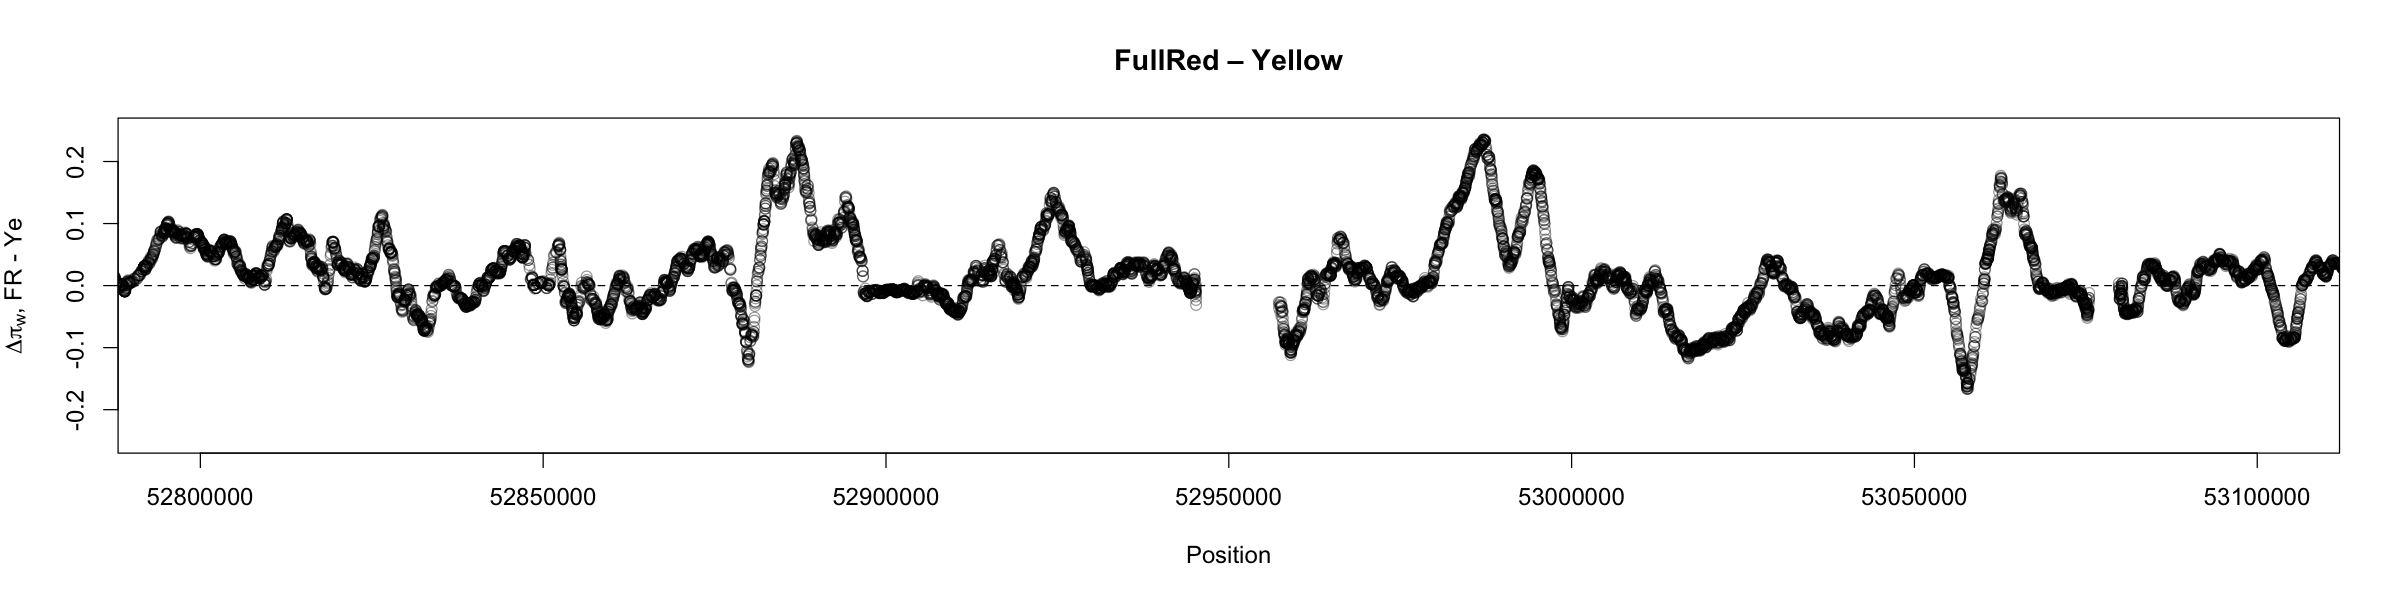

In [78]:
options(repr.plot.width=20 , repr.plot.height=5)
par(cex=1.2)
xLimit=c(52800000, 53100000)

plot((pi_pmFR-pi_pyYe)~mid, w3KBs30b[sites>30], 
     xlim=xLimit, ylim=c(-0.25,0.25),
     main = 'FullRed – Yellow', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"), 
     col=alpha('black',0.4), cex=1)
abline(h=0, lty=2)

## Save plot
# # svg('./_figures/mFRyYe_w3Ks30b/deltaPiW_win3K.svg', width=20, height=5)
# png('./_figures/mFRyYe_w3Ks30b/deltaPiW_win3K.png', width=1000, height=300)
# par(cex=1)
# plot((pi_mFR-pi_yYe)~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, 
#      main = 'FullRed – Yellow', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"), 
#      col=alpha('black',0.4), cex=1)
# abline(h=0, lty=2)
# dev.off()

### Ros1+2 blowup

        V1       V2     V3       V4       V5     V6     V7     V8
    <char>   <char> <char>    <int>    <int> <char> <char> <char>
 1:   Chr6 AUGUSTUS   gene 52853649 52864126   1.89      -      .
 2:   Chr6 AUGUSTUS   gene 52869633 52870232   0.56      -      .
 3:   Chr6 AUGUSTUS   gene 52872363 52874968   0.97      -      .
 4:   Chr6 AUGUSTUS   gene 52887385 52889737      1      +      .
 5:   Chr6 AUGUSTUS   gene 52895587 52897060   0.42      +      .
 6:   Chr6 AUGUSTUS   gene 52898071 52900117   0.96      +      .
 7:   Chr6 AUGUSTUS   gene 52907235 52907834   0.93      -      .
 8:   Chr6 AUGUSTUS   gene 52907940 52911483   0.37      -      .
 9:   Chr6 AUGUSTUS   gene 52919567 52922055   0.29      +      .
10:   Chr6 AUGUSTUS   gene 52943235 52945139      1      -      .


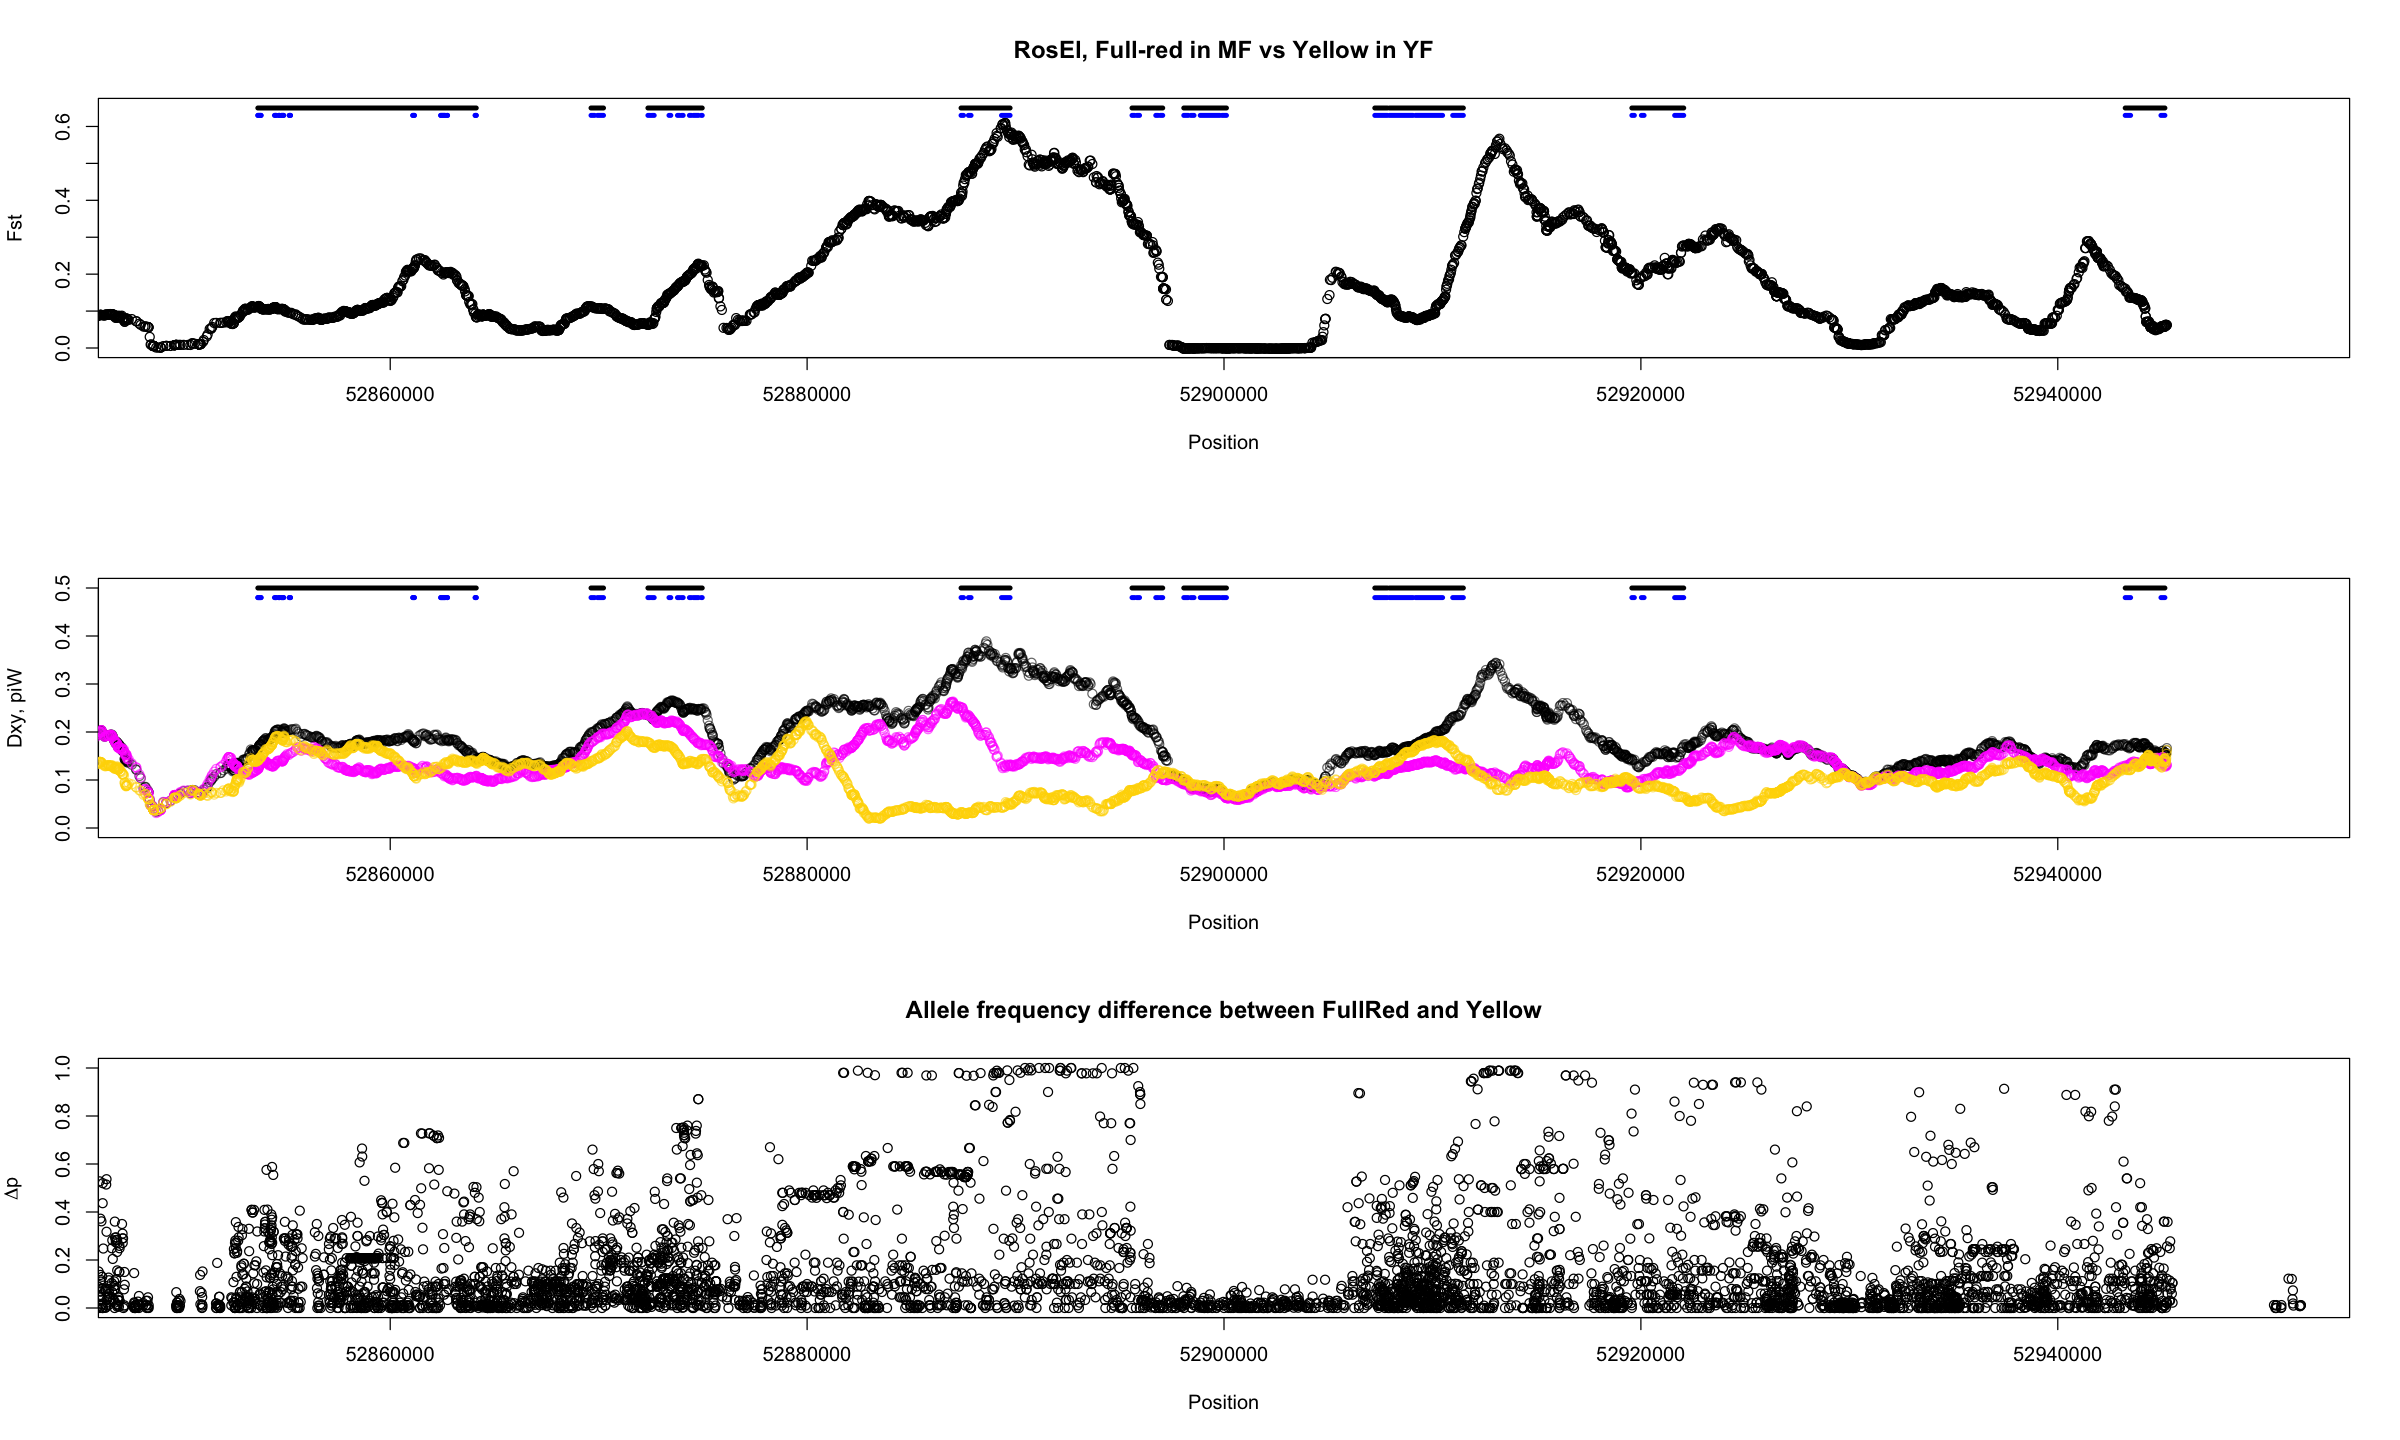

In [85]:
options(repr.plot.width=20 , repr.plot.height=12)
xLabel = 'Position'
Ros = c(52850000, 52950000)

print(gff[V3=='gene' & V4>Ros[1] & V4<Ros[2]][,-9])

par(mfrow=c(3,1), cex=1)
#Fst
plot(Fst_pmFR_pyYe~mid, w3KBs30b[sites>30], 
     xlim=Ros, ylim=c(0,0.65), 
     main='RosEl, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')
for (geneID in 1:nrow(gff[V3 == 'gene'])){
    gene = gff[V3 == 'gene'][geneID,]
    # cat(geneID, gene$V4, gene$V5, '\n')
    segments(x0=gene$V4, x1=gene$V5, y0=0.65, y1=0.65, lwd=4)
}

for (exonID in 1:nrow(gff[V3 == 'exon'])){
    exon = gff[V3 == 'exon'][exonID,]
    segments(x0=exon$V4, x1=exon$V5, y0=0.63, y1=0.63, lwd=4, col='blue')
}

#dxy
plot(dxy_pmFR_pyYe~mid, w3KBs30b[sites>30], 
     xlim=Ros, ylim=c(0,0.5), 
     xlab='Position', ylab='Dxy, piW', col=alpha('black',0.6), cex=1)
points(pi_pmFR~mid, w3KBs30b[sites>30], col=alpha('magenta',0.6), cex=1)
points(pi_pyYe~mid, w3KBs30b[sites>30], col=alpha('gold',0.6), cex=1)
for (geneID in 1:nrow(gff[V3 == 'gene'])){
    gene = gff[V3 == 'gene'][geneID,]
    # cat(geneID, gene$V4, gene$V5, '\n')
    segments(x0=gene$V4, x1=gene$V5, y0=0.5, y1=0.5, lwd=4)
}
for (exonID in 1:nrow(gff[V3 == 'exon'])){
    exon = gff[V3 == 'exon'][exonID,]
    segments(x0=exon$V4, x1=exon$V5, y0=0.48, y1=0.48, lwd=4, col='blue')
}

##alleleFreq
plot(frq_pmFR$POS, abs(frq_pmFR$REF-frq_pyYe$REF), xlim=Ros,
    main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p))

### mid+EL blowup

        V1       V2     V3       V4       V5     V6     V7     V8
    <char>   <char> <char>    <int>    <int> <char> <char> <char>
 1:   Chr6 AUGUSTUS   gene 52958134 52959237   0.84      -      .
 2:   Chr6 AUGUSTUS   gene 52961320 52964290      1      -      .
 3:   Chr6 AUGUSTUS   gene 52970354 52972397   0.97      -      .
 4:   Chr6 AUGUSTUS   gene 52974518 52976358      1      -      .
 5:   Chr6 AUGUSTUS   gene 52977910 52979034   0.67      -      .
 6:   Chr6 AUGUSTUS   gene 52979650 52980711   0.94      -      .
 7:   Chr6 AUGUSTUS   gene 52982859 52983308   0.99      -      .
 8:   Chr6 AUGUSTUS   gene 52996409 52998275   0.55      +      .
 9:   Chr6 AUGUSTUS   gene 53007941 53010054      1      +      .
10:   Chr6 AUGUSTUS   gene 53012715 53027902   0.86      +      .
11:   Chr6 AUGUSTUS   gene 53028723 53029760   0.55      -      .
12:   Chr6 AUGUSTUS   gene 53031892 53034697   0.35      +      .
13:   Chr6 AUGUSTUS   gene 53037794 53038210   0.73      -      .
14:   Chr6

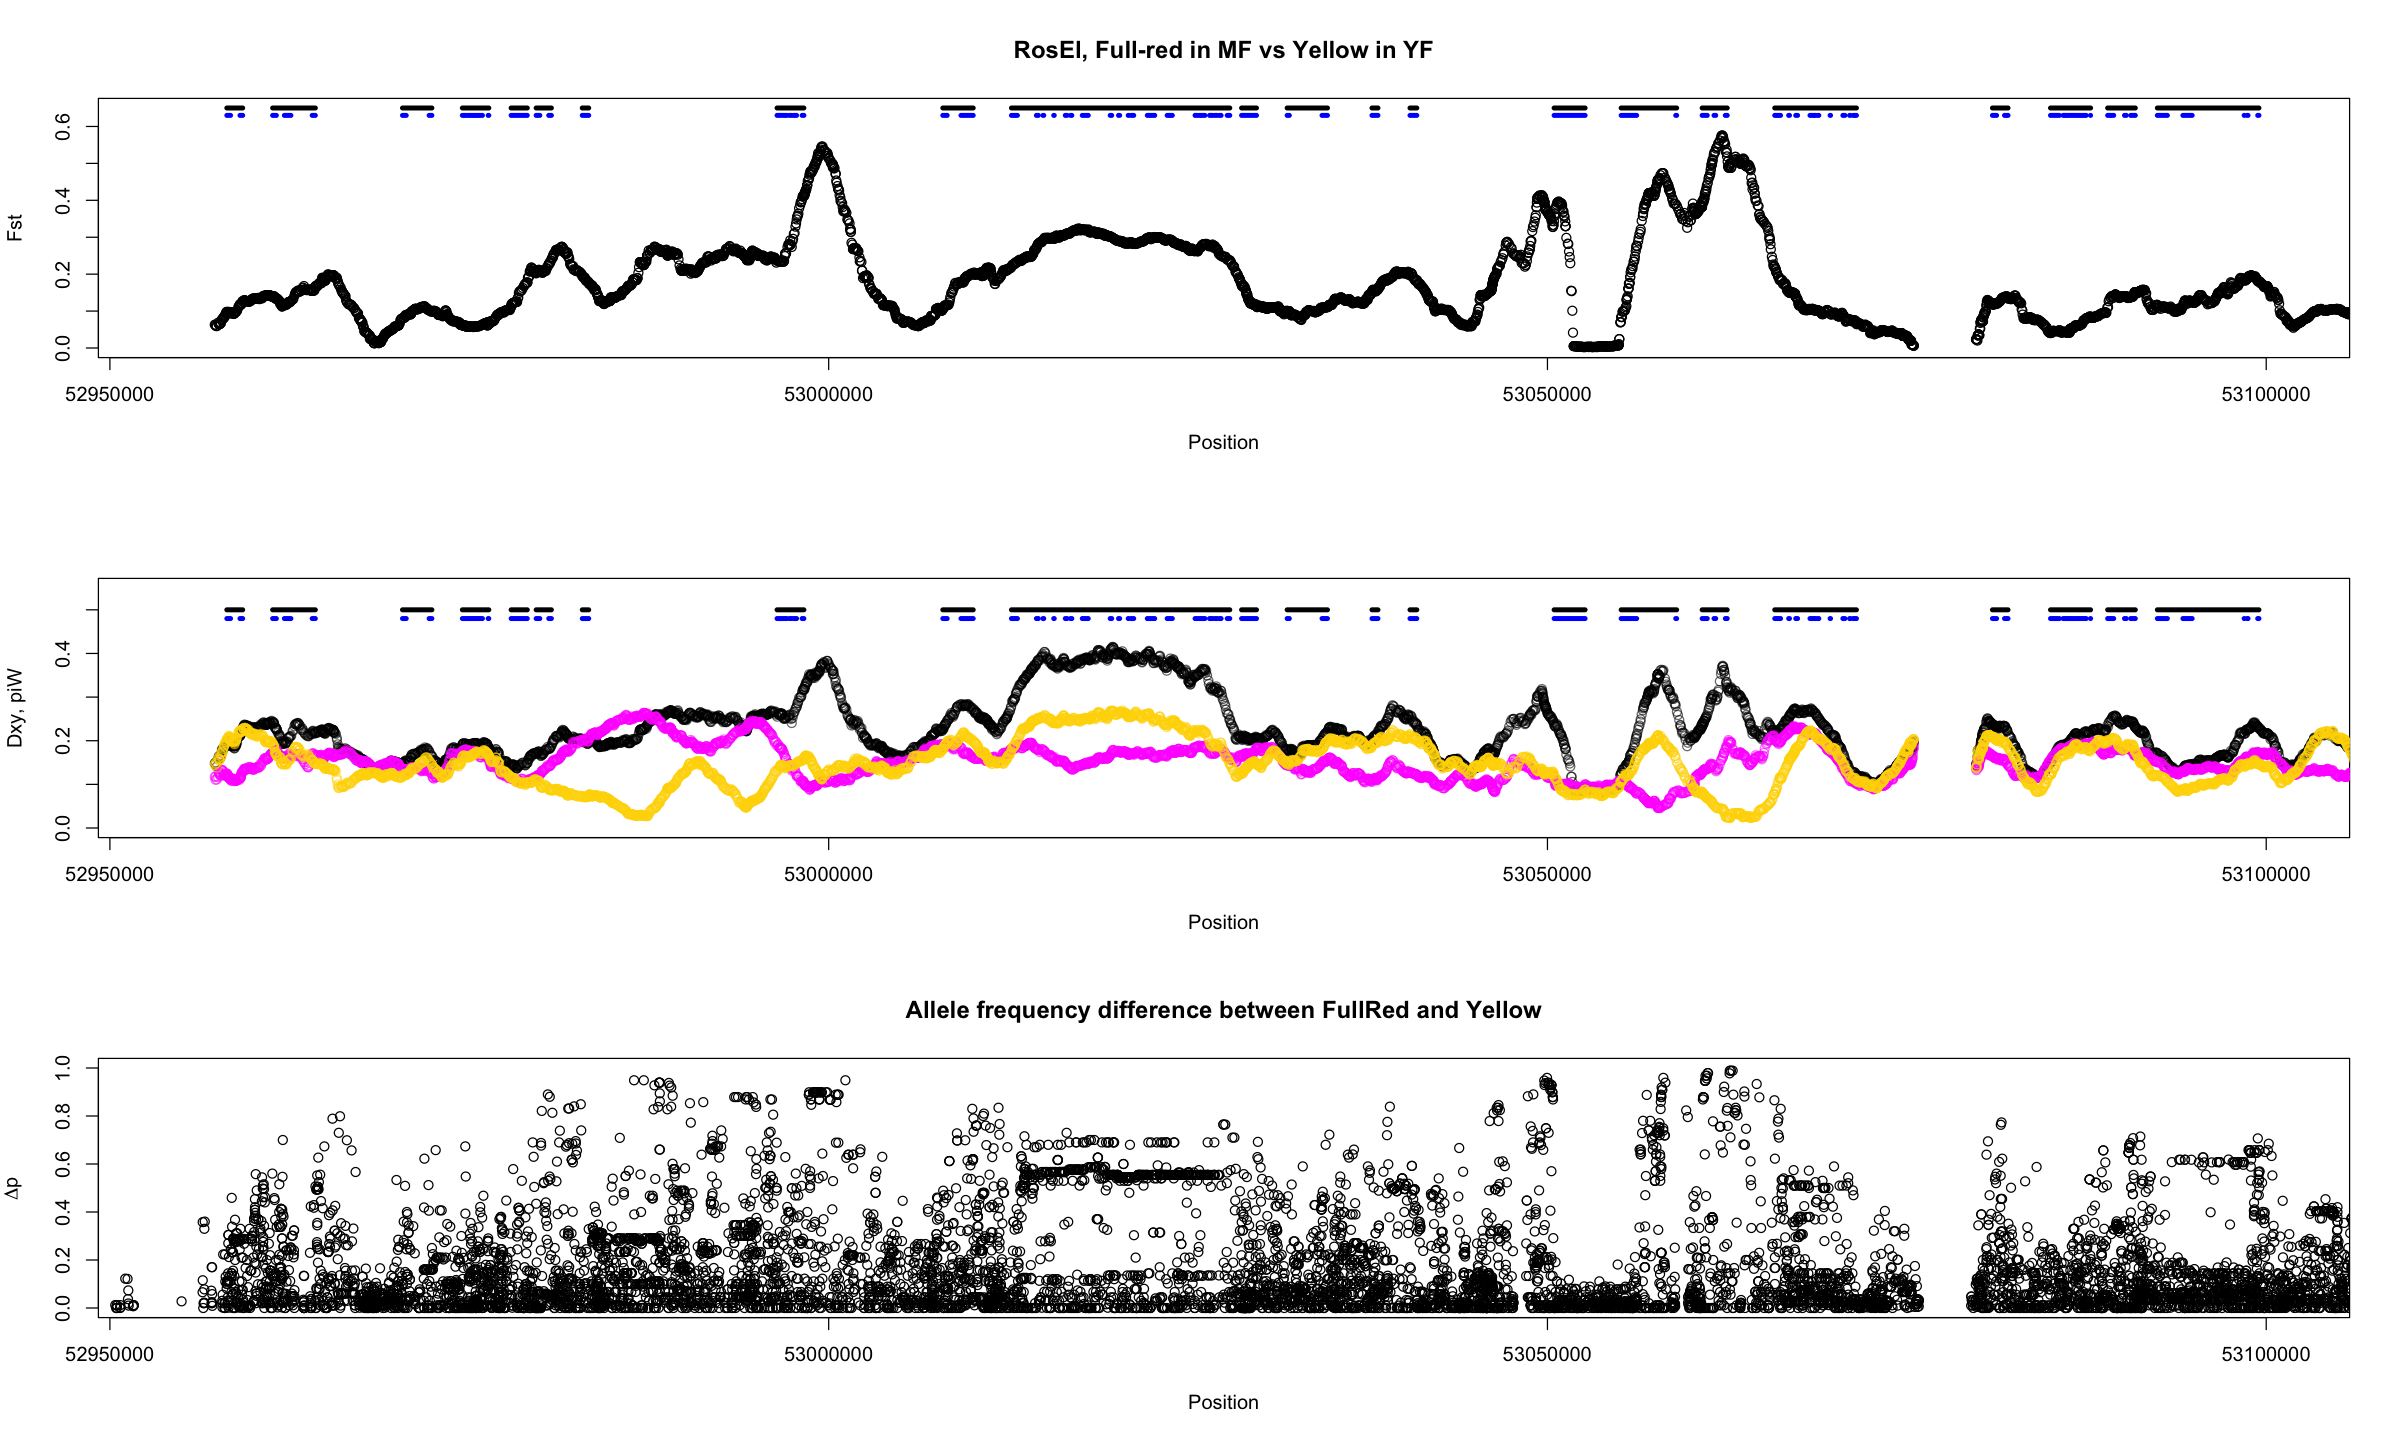

In [86]:
options(repr.plot.width=20 , repr.plot.height=12)
xLabel = 'Position'
El = c(52955000, 53100000)

print(gff[V3=='gene' & V4>El[1] & V4<El[2]][,-9])

par(mfrow=c(3,1), cex=1)

#Fst
plot(Fst_pmFR_pyYe~mid, w3KBs30b[sites>30], 
     xlim=El, ylim=c(0,0.65), 
     main='RosEl, Full-red in MF vs Yellow in YF', xlab='Position', ylab='Fst')
for (geneID in 1:nrow(gff[V3 == 'gene'])){
    gene = gff[V3 == 'gene'][geneID,]
    # cat(geneID, gene$V4, gene$V5, '\n')
    segments(x0=gene$V4, x1=gene$V5, y0=0.65, y1=0.65, lwd=4)
}

for (exonID in 1:nrow(gff[V3 == 'exon'])){
    exon = gff[V3 == 'exon'][exonID,]
    segments(x0=exon$V4, x1=exon$V5, y0=0.63, y1=0.63, lwd=4, col='blue')
}

#dxy
plot(dxy_pmFR_pyYe~mid, w3KBs30b[sites>30], xlim=El, ylim=c(0,0.55), 
     xlab='Position', ylab='Dxy, piW', col=alpha('black',0.6))
points(pi_pmFR~mid, w3KBs30b[sites>30], col=alpha('magenta',0.6))
points(pi_pyYe~mid, w3KBs30b[sites>30], col=alpha('gold',0.6))
for (geneID in 1:nrow(gff[V3 == 'gene'])){
    gene = gff[V3 == 'gene'][geneID,]
    segments(x0=gene$V4, x1=gene$V5, y0=0.5, y1=0.5, lwd=4)
}
for (exonID in 1:nrow(gff[V3 == 'exon'])){
    exon = gff[V3 == 'exon'][exonID,]
    segments(x0=exon$V4, x1=exon$V5, y0=0.48, y1=0.48, lwd=4, col='blue')
}

##alleleFreq
plot(frq_pmFR$POS, abs(frq_pmFR$REF-frq_pyYe$REF), xlim=El,
    main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p))

### Plots per site

In [103]:
frq_pmFR$POS[which(abs(frq_pmFR$REF-frq_pyYe$REF) == 1)]

[1] 52890454 52890695 52891124 52891424 52891610 52892149 52892157 52892652
 [9] 52892676 52894133 52895049 52895241 52895651

In [112]:
coords100 = which(abs(frq_pmFR$REF-frq_pyYe$REF) == 1)
coords95 = which(abs(frq_pmFR$REF-frq_pyYe$REF) > 0.98)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01111 0.04000 0.08472 0.10000 1.00000 

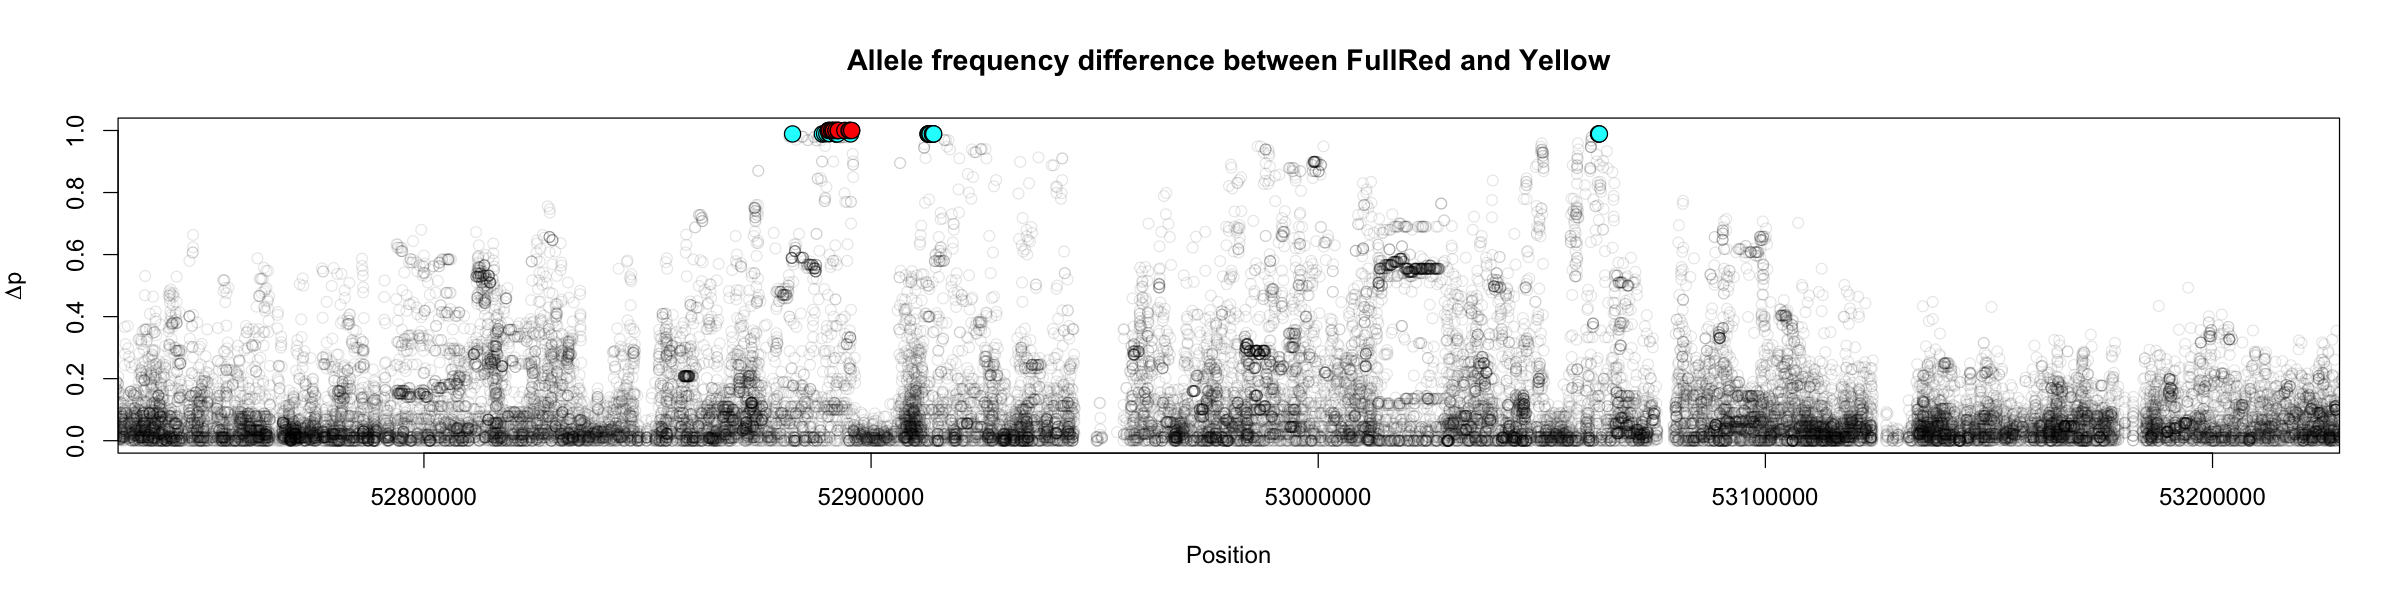

In [114]:
options(repr.plot.width=20 , repr.plot.height=5)
xLimit=c(52750000, 53210000)
par(cex=1.2)

summary(abs(frq_pmFR$REF-frq_pyYe$REF))

plot(frq_pmFR$POS, abs(frq_pmFR$REF-frq_pyYe$REF), xlim=xLimit,
    main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p), col=alpha('black',0.1))

points(frq_pmFR$POS[coords95], abs(frq_pmFR$REF-frq_pyYe$REF)[coords95], xlim=xLimit,
       main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p),
       pch=21, col='black', bg='cyan', cex=1.5
      )

points(frq_pmFR$POS[coords100], abs(frq_pmFR$REF-frq_pyYe$REF)[coords100], xlim=xLimit,
       main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p),
       pch=21, col='black', bg='red', cex=1.5
      )


## Save plot
# svg('./_figures/mFRyYe_w3Ks30b/alleleFreq.svg', width=20, height=5)
# png('./_figures/mFRyYe_w3Ks30b/alleleFreq.png', width=1000, height=300)
# par(cex=1)
# plot(frq_mFR$POS, abs(frq_mFR$REF-frq_yYe$REF), xlim=xLimit*1e6,
#     main='Allele frequency difference between FullRed and Yellow', xlab='Position', ylab=expression(Delta*p))
# dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01111 0.04000 0.08472 0.10000 1.00000 

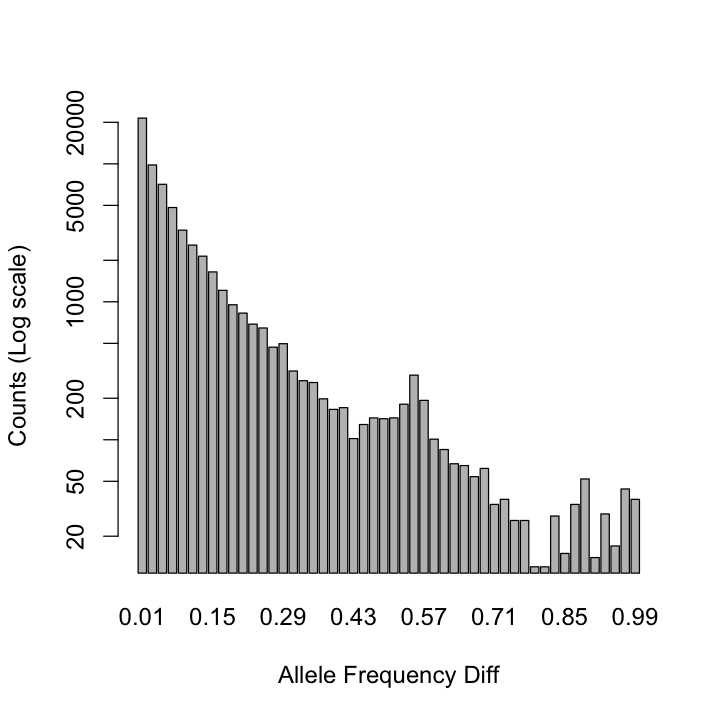

In [82]:
options(repr.plot.width=6, repr.plot.height=6)
summary(abs(frq_mFR$REF-frq_yYe$REF))

par(cex=1.2)
h = hist(abs(frq_pmFR$REF-frq_pyYe$REF), breaks=50, plot = F)
barplot(height=(h$counts), names=h$mids, log='y',
       xlab='Allele Frequency Diff', ylab='Counts (Log scale)')

## Save plot
# svg('./_figures/mFRyYe_w3Ks30b/hist_alleleFreq.svg', width=6, height=6)
# png('./_figures/mFRyYe_w3Ks30b/hist_alleleFreq.png', width=480, height=480)
# par(cex=1.2)
# barplot(height=(h$counts), names=h$mids, log='y',
#        xlab='Allele Frequency Diff', ylab='Counts (Log scale)')
# dev.off()

### Plots per site and windows

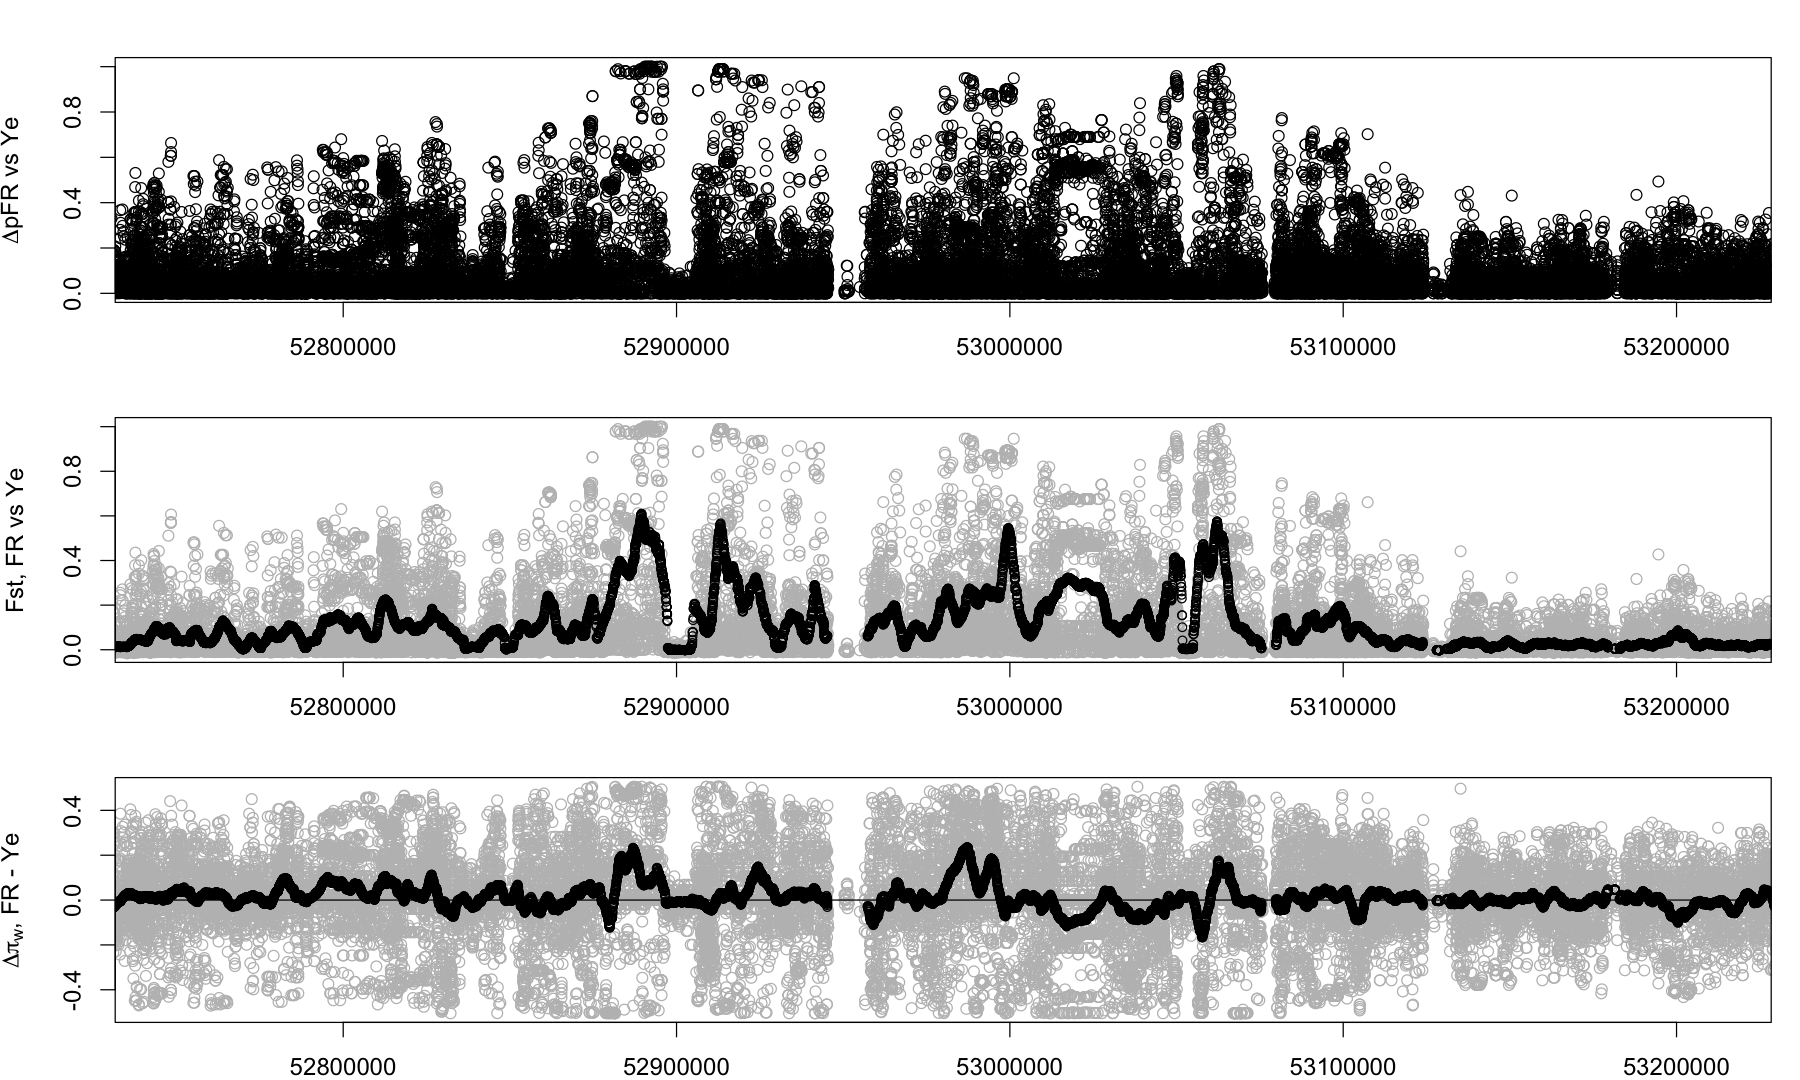

In [88]:
options(repr.plot.width=15, repr.plot.height=9)

par(mfrow=c(3,1), cex=1, mar=c(2,4,2,1))
# par(mfrow=c(3,1), cex=1)

## Allele Freq Difference
par(cex=1.2)
plot(frq_pmFR$POS, abs(frq_pmFR$REF-frq_pyYe$REF), xlim=xLimit,
     # main='Allele frequency difference between FullRed and Yellow', 
     xlab='Position', ylab=expression(Delta*p*'FR vs Ye'))

## Fst
plot(siteFst$POS, siteFst$WEIR_AND_COCKERHAM_FST, xlim=xLimit, col='grey',
     # main='RosEl, Full-red in MF vs Yellow in YF', 
     xlab='Position', ylab='Fst, FR vs Ye')
points(Fst_pmFR_pyYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, cex=0.8)

## Difference in pi-within
plot(sitePi_mFR$POS, (sitePi_pmFR$PI-sitePi_pyYe$PI), xlim=xLimit, col='grey', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"))
points((pi_pmFR-pi_pyYe)~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
# points(dxy_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
abline(h=0)

In [21]:
# svg('./_figures/mFRyYe_w3Ks30b/AF+Fst+PiDxy_win3K+sites.svg', width=15, height=12)
png('./_figures/mFRyYe_w3Ks30b/AF+Fst+PiDxy_win3K+sites.png', width=1000, height=800)
# --- 
par(mfrow=c(3,1), cex=1, mar=c(2,4,2,1))

## Allele Freq Difference
par(cex=1.2)
plot(frq_mFR$POS, abs(frq_mFR$REF-frq_yYe$REF), xlim=xLimit*1e6,
     # main='Allele frequency difference between FullRed and Yellow', 
     xlab='Position', ylab=expression(Delta*p*'FR vs Ye'))

## Fst
plot(siteFst$POS, siteFst$WEIR_AND_COCKERHAM_FST, xlim=xLimit*1e6, col='grey',
     # main='RosEl, Full-red in MF vs Yellow in YF', 
     xlab='Position', ylab='Fst, FR vs Ye')
points(Fst_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, cex=0.8)

## Difference in pi-within
plot(sitePi_mFR$POS, (sitePi_mFR$PI-sitePi_yYe$PI), xlim=xLimit*1e6, col='grey', xlab='Position', ylab=expression(Delta*pi[w]*", FR - Ye"))
points((pi_mFR-pi_yYe)~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
# points(dxy_mFR_yYe~mid, w3KBs30b[sites>30], xlim=xLimit*1e6, col=alpha('black',1), cex=0.8)
abline(h=0)
# ---
dev.off()

pdf 
  2